# 

In [1]:
! pip install missingno # install the missingno library which is used for checking nas

In [2]:
# import libraries here
import pandas as pd
import missingno as msno # missing values
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator#generate word cloud image and extract color from an image
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [3]:
#load the aribnb dataset
airbnb_data = pd.read_csv("listings1.csv")
#load the rental market dataset
housing_data = pd.read_csv('voa-average-rent-borough.csv',low_memory=False,skiprows=2)
#load the geo-spatial data
london_geodata=gpd.read_file('neighbourhoods.geojson')

<Axes: >

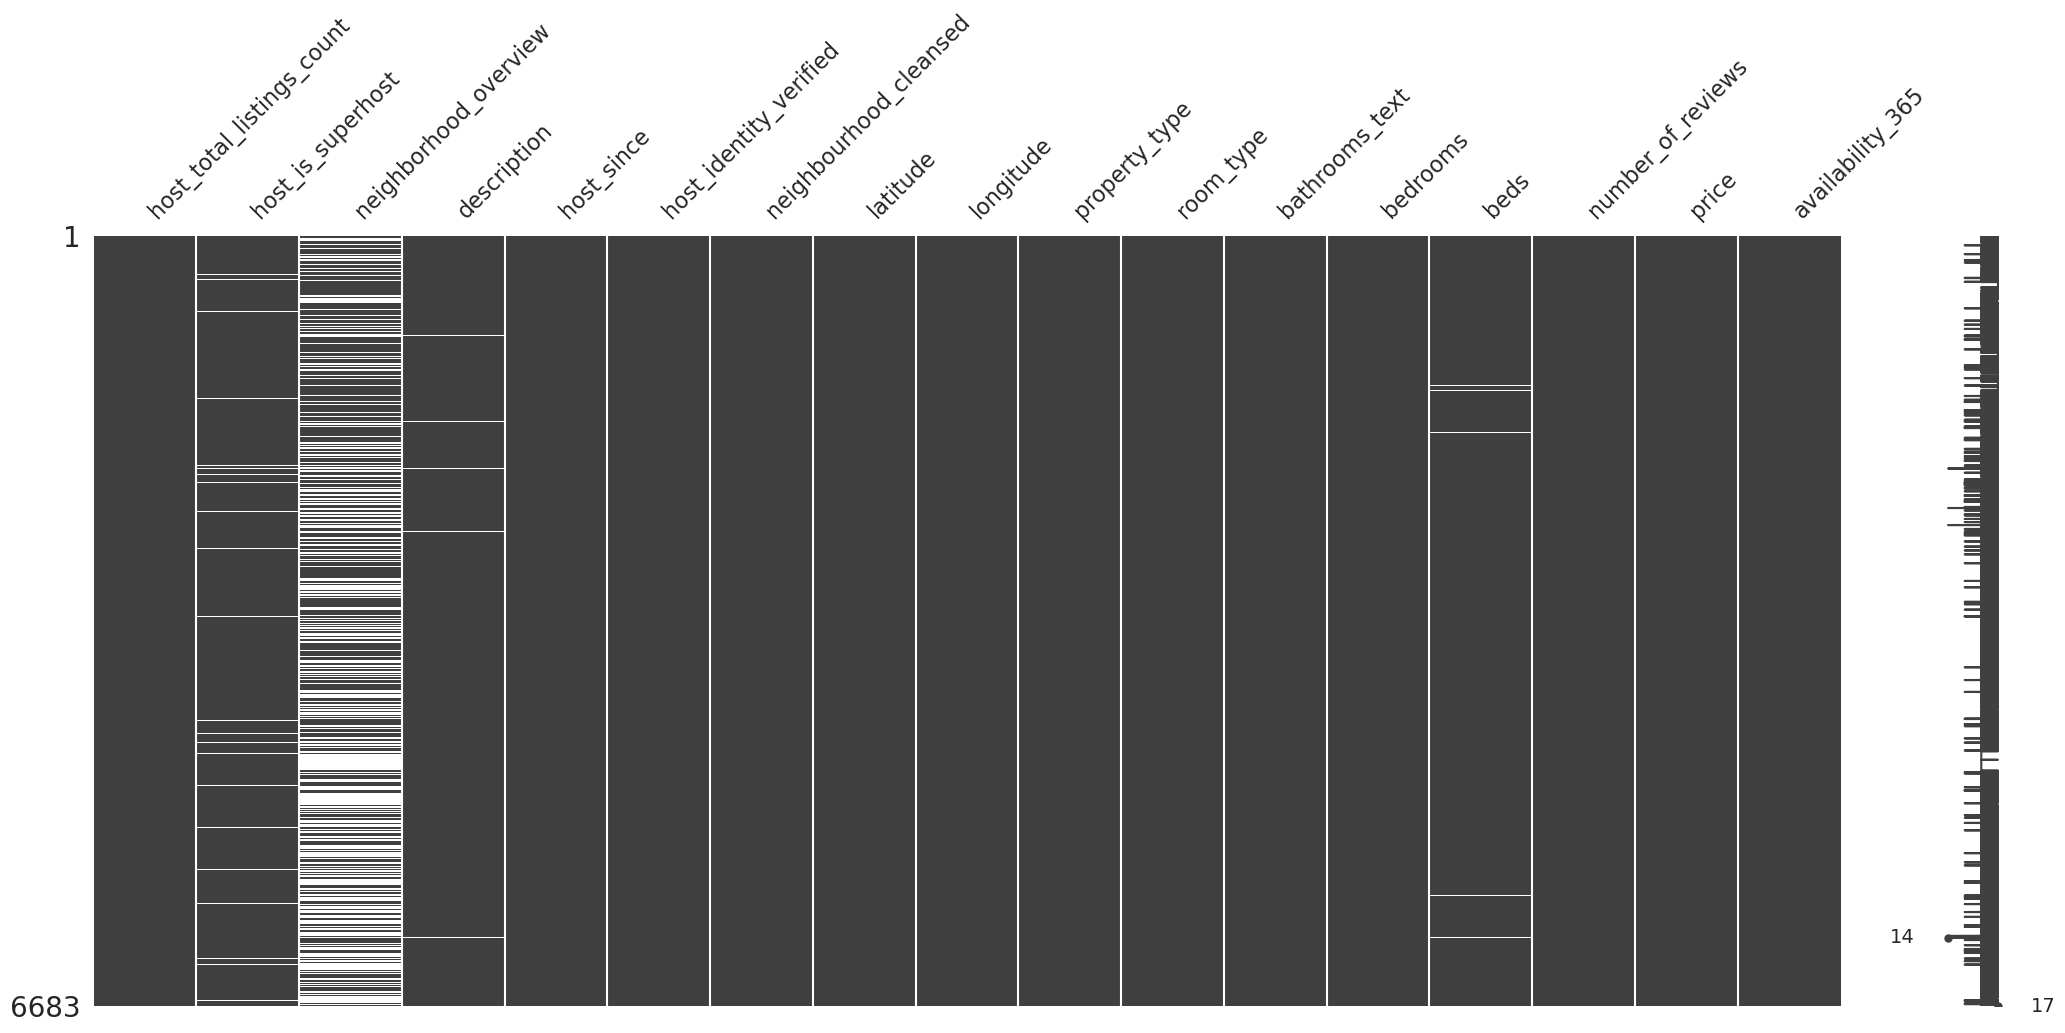

In [4]:
#using the msno matrix to have a quick look about nas in our airbnb dataset
#the white lines here represent missing value so if a column is whole back means there is no na in that column
sn.set(style="ticks")
msno.matrix(airbnb_data)

In [5]:
airbnb_data.head()
airbnb_data

host_total_listings_count host_is_superhost  \
0                          37.0                 f   
1                           3.0                 f   
2                           4.0                 f   
3                          17.0                 t   
4                          17.0                 t   
...                         ...               ...   
6678                       21.0                 f   
6679                       43.0                 f   
6680                        4.0                 f   
6681                       50.0                 f   
6682                        3.0                 t   

                                  neighborhood_overview  \
0     Excellent location between Angel and Kings Cro...   
1                                                   NaN   
2     The neighbourhood is very safe and in a Centra...   
3     Clapham is one of London's best known and popu...   
4     Within a 5 minute walk there are numerous shop...   
...                                                 ...   
6678  Very central busy professional neighbourhood w...   
6679  Immerse yourself in the energetic atmosphere o...   
6680  Discover an up-and-coming neighborhood that ef...   
6681  You will enjoy living the city as a local, in ...   
6682                                                NaN   

                                            description  host_since  \
0     Welcome to my home. Enjoy central London livin...  2017-02-23   
1     A modern duplex flat on the 2nd floor of a Vic...  2016-01-07   
2     Welcome to my home! My charming one bedroom ap...  2016-01-01   
3     Quality Accredited by The Association of Servi...  2016-01-11   
4     Quality Accredited by The Association of Servi...  2016-01-11   
...                                                 ...         ...   
6678  Enjoy a stylish experience at this centrally-l...  2017-10-16   
6679  Welcome to Camden, London's vibrant and eclect...  2016-02-23   
6680  You're invited to stay in our charming, sunlit...  2017-01-07   
6681  Beautiful, spacious, high spec garden Apartmen...  2017-01-01   
6682  Forget your worries in this spacious beautiful...  2017-08-15   

     host_identity_verified neighbourhood_cleansed   latitude  longitude  \
0                         t              Islington  51.529790  -0.114760   
1                         t                 Camden  51.545929  -0.183253   
2                         t            Westminster  51.512840  -0.178150   
3                         t             Wandsworth  51.451550  -0.147680   
4                         t             Wandsworth  51.440480  -0.171000   
...                     ...                    ...        ...        ...   
6678                      t            Westminster  51.520427  -0.160709   
6679                      t              Islington  51.553390  -0.125830   
6680                      t          Tower Hamlets  51.507948  -0.015201   
6681                      t                Lambeth  51.488110  -0.106330   
6682                      t               Haringey  51.589383  -0.115413   

           property_type        room_type bathrooms_text  bedrooms  beds  \
0     Entire rental unit  Entire home/apt      1.5 baths       1.0   2.0   
1           Entire condo  Entire home/apt        2 baths       2.0   2.0   
2     Entire rental unit  Entire home/apt         1 bath       2.0   2.0   
3     Entire rental unit  Entire home/apt         1 bath       1.0   2.0   
4     Entire rental unit  Entire home/apt         1 bath       2.0   3.0   
...                  ...              ...            ...       ...   ...   
6678  Entire rental unit  Entire home/apt         1 bath       2.0   2.0   
6679  Entire rental unit  Entire home/apt         1 bath       1.0   1.0   
6680  Entire rental unit  Entire home/apt         1 bath       3.0   3.0   
6681  Entire rental unit  Entire home/apt         1 bath       1.0   1.0   
6682  Entire rental unit  Entire home/apt        2 baths  

In [6]:
airbnb_data.columns

Index(['host_total_listings_count', 'host_is_superhost',
       'neighborhood_overview', 'description', 'host_since',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'bathrooms_text', 'bedrooms',
       'beds', 'number_of_reviews', 'price', 'availability_365'],
      dtype='object')

In [7]:
# Filter out the columns
columns_to_keep = ['host_total_listings_count','host_is_superhost','neighborhood_overview','description', 'host_since', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms_text', 'bedrooms', 'beds', 'number_of_reviews', 'price', 'availability_365']
airbnb_data = airbnb_data[columns_to_keep]

# Filter the data to include only listings that are available
airbnb_data = airbnb_data[airbnb_data['availability_365'] > 0]

#select the numerical columns
numerical_columns = ['host_total_listings_count','price', 'host_since', 'bedrooms', 'beds','latitude','longitude']


# Calculate descriptive statistics for categorical columns
categorical_columns = ['host_is_superhost','neighborhood_overview','description','property_type', 'room_type', 'host_identity_verified','bathrooms_text','neighbourhood_cleansed','number_of_reviews']



#check whether the columns in numerical_columns is numerical or not
for column in numerical_columns:
    if column in airbnb_data.columns:
        print(f"Data type of '{column}': {airbnb_data[column].dtype}")
        if pd.api.types.is_numeric_dtype(airbnb_data[column]):
            print(f"{column} is numeric.")
        else:
            print(f"{column} is not numeric.")
    else:
        print(f"{column} is not in the DataFrame.")


Data type of 'host_total_listings_count': float64
host_total_listings_count is numeric.
Data type of 'price': float64
price is numeric.
Data type of 'host_since': object
host_since is not numeric.
Data type of 'bedrooms': float64
bedrooms is numeric.
Data type of 'beds': float64
beds is numeric.
Data type of 'latitude': float64
latitude is numeric.
Data type of 'longitude': float64
longitude is numeric.


In [8]:
# as we have price saved as a format like $130,000.00 so we need to deal with the '$' and ',' to convert it to numeric
#airbnb_data['price'] = airbnb_data['price'].str.replace('$','', regex=False).str.replace(',','').astype('float')
airbnb_data['price'] = pd.to_numeric(airbnb_data['price'], errors='coerce')
#convert host_since to the date format 
airbnb_data['host_since'] = pd.to_datetime(airbnb_data['host_since'])

In [9]:
# Define the start and end date for the period
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-12-31')

# Filter the DataFrame for rows where the host_since falls within the specified range
airbnb_data = airbnb_data[(airbnb_data['host_since'] >= start_date) & (airbnb_data['host_since'] <= end_date)]

# Display the filtered DataFrame
print(airbnb_data.head())

     host_total_listings_count host_is_superhost  \
0                         37.0                 f   
127                       15.0                 f   
141                        8.0                 t   
158                        8.0                 t   
207                        2.0                 t   

                                 neighborhood_overview  \
0    Excellent location between Angel and Kings Cro...   
127  Great area: Situated in a lovely, tree-lined s...   
141  Locke is conveniently located within minutes f...   
158  Locke is conveniently located within minutes f...   
207                                                NaN   

                                           description host_since  \
0    Welcome to my home. Enjoy central London livin... 2017-02-23   
127  Feel instantly at-home and live like a Londone... 2018-04-08   
141  Locke’s apartments have been intelligently des... 2018-09-19   
158  Our brand new design-led aparthotel on Leman S... 2018-09

<Axes: >

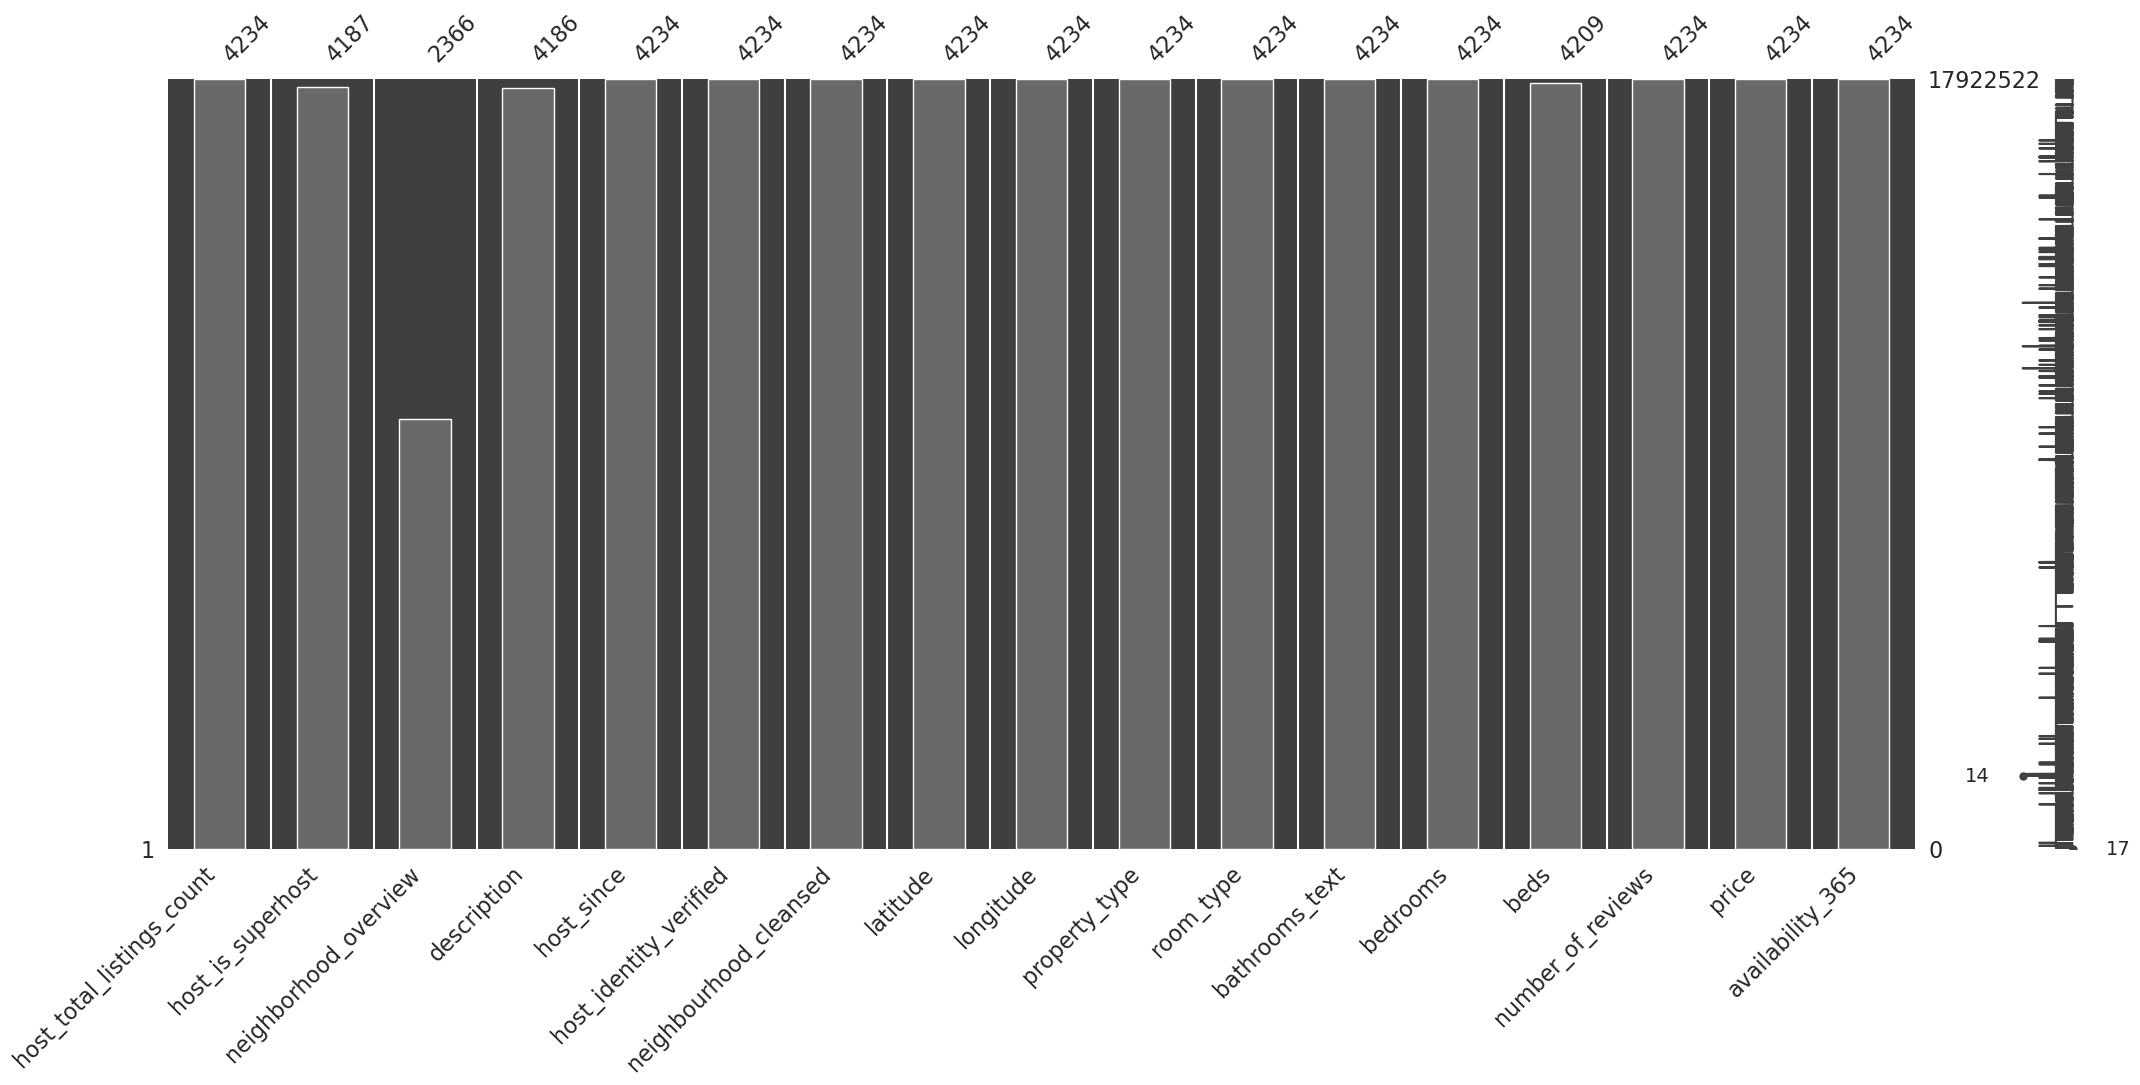

In [10]:
# check the na for airbnb data after selecting the specifc columns as there are only 52 rows containing na for bedroom_text 
# simultaneously, 37965 rows for bedrooms excluding na while other clean column has 57115 rows
# in turn, we have decided to remove those rows contatining na directly
# drop those rows containing na
sn.set(style="ticks")
msno.matrix(airbnb_data)
msno.bar(airbnb_data)

<Axes: >

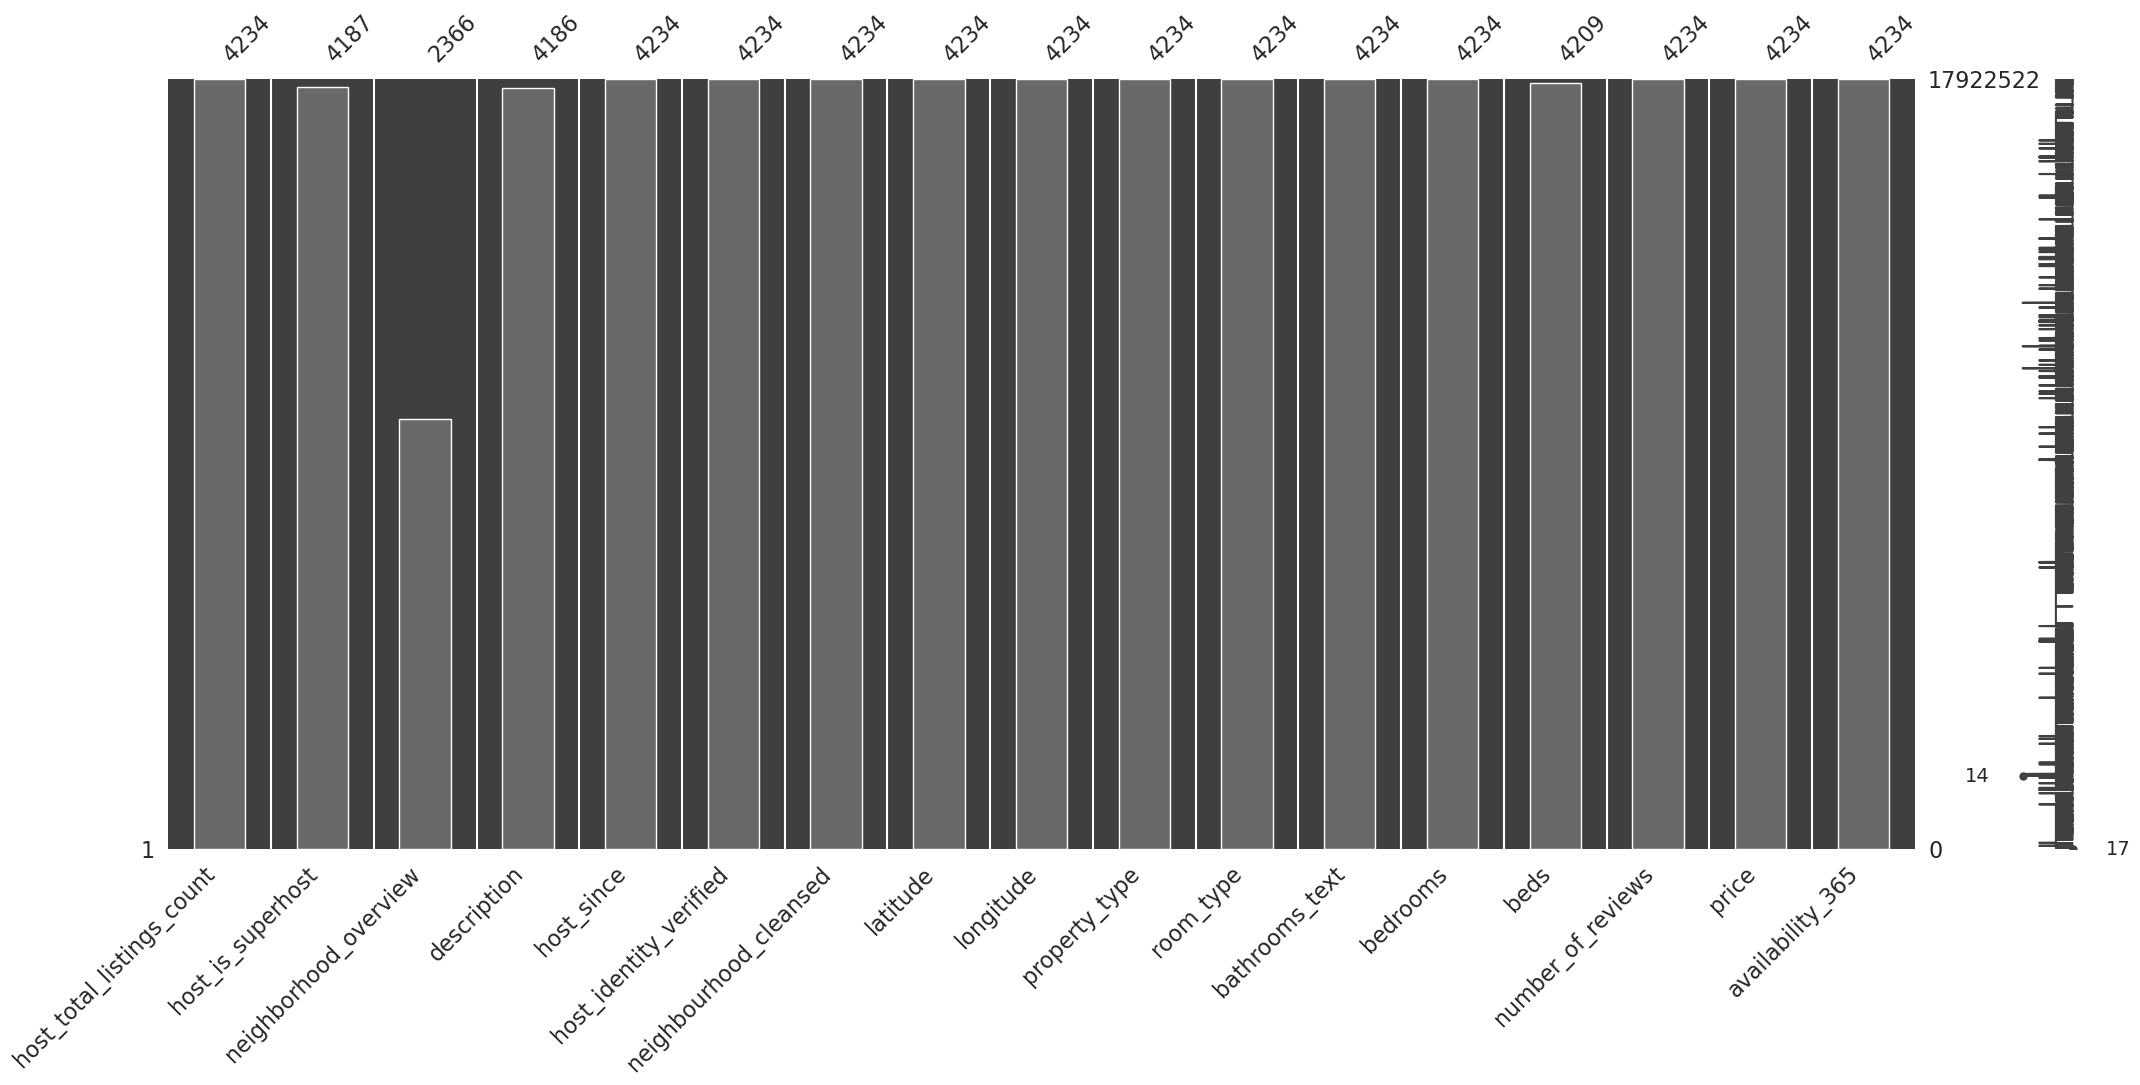

In [11]:
#drop na and empty string for airbnb_data

airbnb_data = airbnb_data[(airbnb_data['bathrooms_text'].notna() & (airbnb_data['bathrooms_text'] != '')) & 
                                   (airbnb_data['bedrooms'].notna() & (airbnb_data['bedrooms'] != ''))]


#drop the na and empty string then check the na again
sn.set(style="ticks")
msno.matrix(airbnb_data)
msno.bar(airbnb_data)

In [12]:
# write the descriptive statistics into a txt file which seems to be easy for analysis

for column in numerical_columns:
    print(f"Descriptive statistics for {column}:")
    print(str(airbnb_data[column].describe()))
     

for column in categorical_columns:
    print(f"Unique values for {column}:\n")
    print(str(airbnb_data[column].value_counts()))
        

Descriptive statistics for host_total_listings_count:
count    4234.000000
mean      384.743505
std      1235.712691
min         2.000000
25%         4.000000
50%        17.000000
75%        74.000000
max      5076.000000
Name: host_total_listings_count, dtype: float64
Descriptive statistics for price:
count    4234.000000
mean      364.368682
std       467.508870
min        39.000000
25%       148.000000
50%       210.000000
75%       377.000000
max      9857.000000
Name: price, dtype: float64
Descriptive statistics for host_since:
count                             4234
mean     2017-12-12 08:31:10.571563520
min                2017-01-01 00:00:00
25%                2017-05-09 00:00:00
50%                2017-11-21 12:00:00
75%                2018-06-12 00:00:00
max                2018-12-30 00:00:00
Name: host_since, dtype: object
Descriptive statistics for bedrooms:
count    4234.000000
mean        1.807511
std         1.020013
min         1.000000
25%         1.000000
50%         2.

<Axes: >

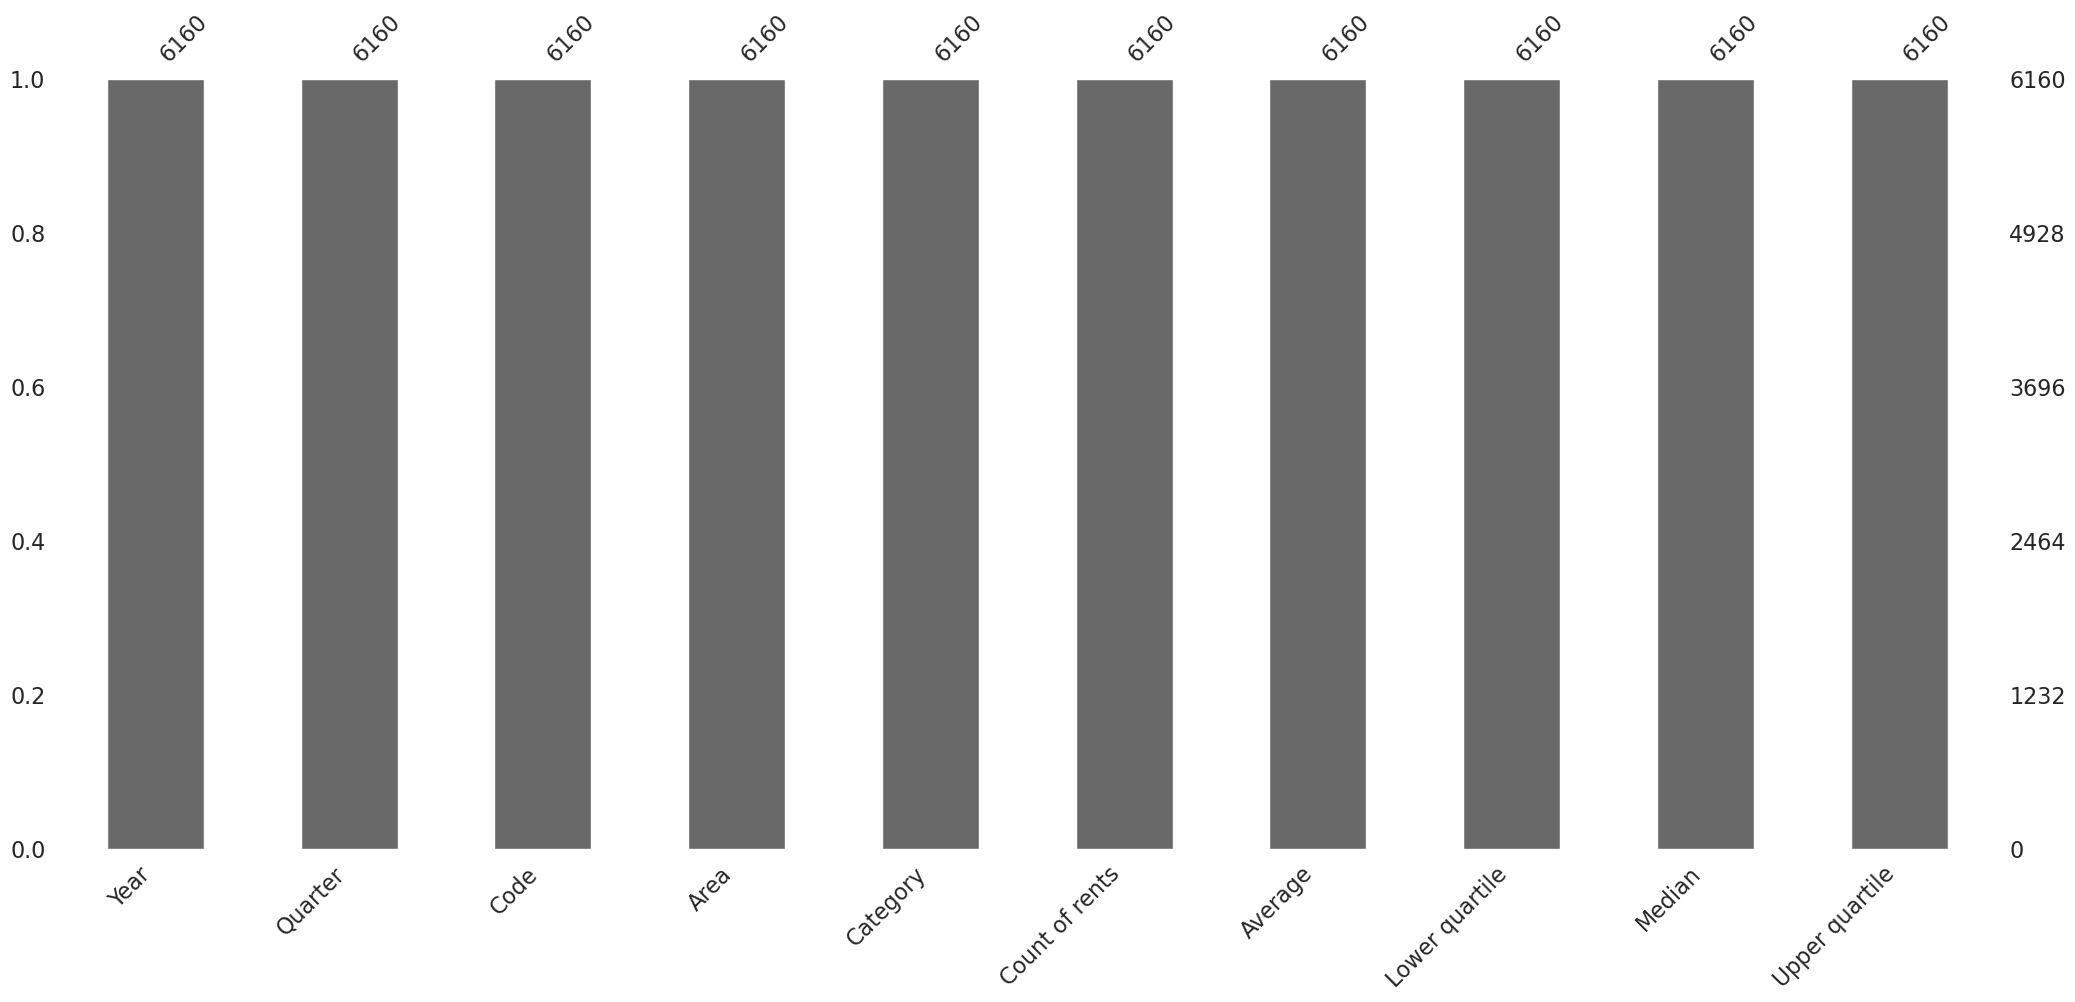

In [13]:
#have a quick look for the na in our housing data
sn.set(style="ticks")
msno.bar(housing_data)

In [14]:
#check the data types for our housing data
housing_data.dtypes

Year               int64
Quarter           object
Code              object
Area              object
Category          object
Count of rents    object
Average           object
Lower quartile    object
Median            object
Upper quartile    object
dtype: object

In [15]:
"""
===
For the descriptive statistics for LTL Data
===
"""
#actually we don't have na in our housing dataset but we have symbol . instead which fill in the empty cell
#set a boolean mask to remove these dots
mask=(housing_data == ".").any(axis=1)
housing_data=housing_data[~mask]

# Filter out the columns
condition = (
    (housing_data['Year'] >= 2016) &
    (housing_data['Year'] <= 2018))

housing_data = housing_data[condition]


#Descriptive statistics for 'Count of rents
print("Descriptive statistics for 'Count of rents':")
print(str(housing_data['Count of rents'].describe()))

#Descriptive statistics for 'Average
print("Descriptive statistics for 'Average':")
print(str(housing_data['Average'].describe()))
    
# Value counts for 'Area'
print("Value counts for 'Area':")
print(str(housing_data['Area'].value_counts()))
   

# Value counts for 'Category'
print("Value counts for 'Category':")
print(str(housing_data['Category'].value_counts()))

Descriptive statistics for 'Count of rents':
count     1835
unique     572
top         20
freq        46
Name: Count of rents, dtype: object
Descriptive statistics for 'Average':
count     1835
unique    1263
top         ..
freq         9
Name: Average, dtype: object
Value counts for 'Area':
Area
Barking and Dagenham        42
Barnet                      42
Redbridge                   42
Richmond upon Thames        42
Southwark                   42
Sutton                      42
Tower Hamlets               42
Waltham Forest              42
Wandsworth                  42
Westminster                 42
NORTH EAST                  42
NORTH WEST                  42
YORKSHIRE AND THE HUMBER    42
EAST MIDLANDS               42
WEST MIDLANDS               42
EAST                        42
LONDON                      42
SOUTH EAST                  42
SOUTH WEST                  42
Inner London                42
Outer London                42
Newham                      42
Merton              

In [16]:
housing_data['Average'] = pd.to_numeric(housing_data['Average'], errors='coerce')

/tmp/ipykernel_162194/1656322605.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(airbnb_data['price'])  # histogram for airbnb's price
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', T

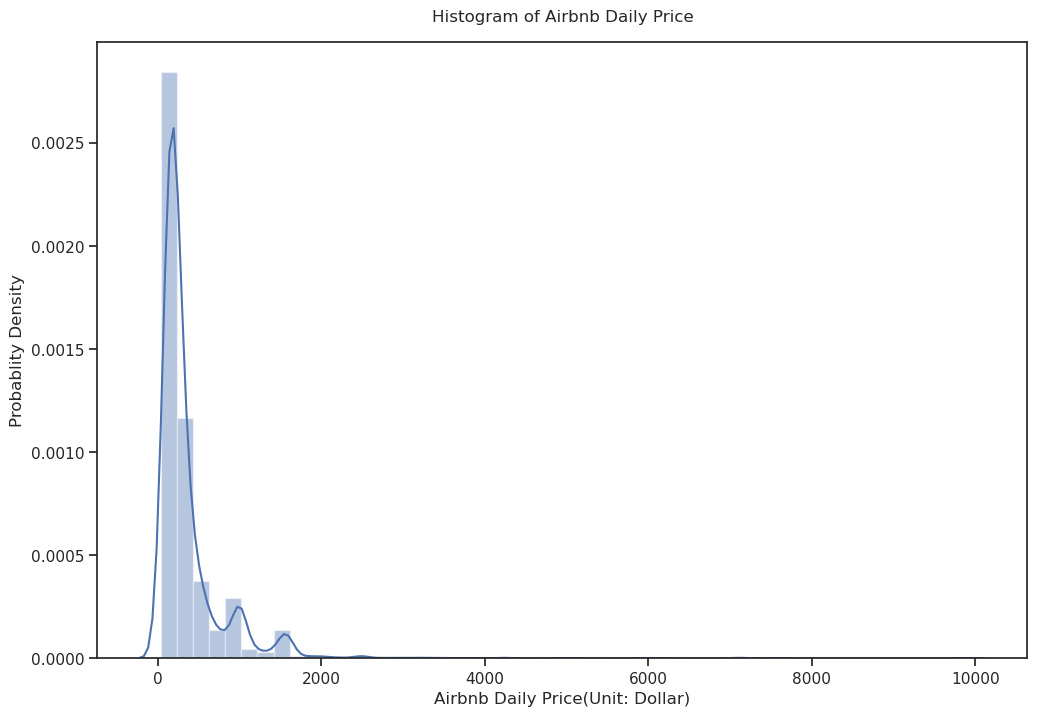

In [17]:
plt.figure(figsize=(12,8))
sn.distplot(airbnb_data['price'])  # histogram for airbnb's price
plt.title('Histogram of Airbnb Daily Price', y=1.02)
plt.ylabel('Probablity Density')
plt.xlabel('Airbnb Daily Price(Unit: Dollar)')
plt.savefig('Histogram_Airbnb_Price.png', bbox_inches='tight') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


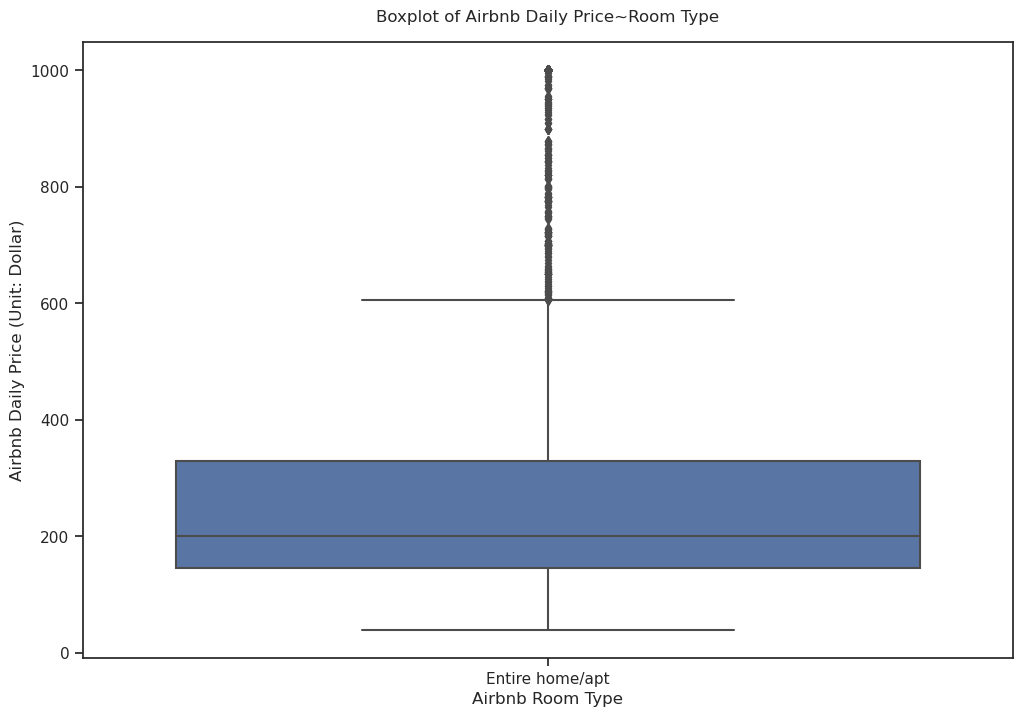

In [18]:
plt.figure(figsize=(12,8))
sn.boxplot(x = 'room_type',
            y = 'price',
            data=airbnb_data[airbnb_data.price<=1000]
           )
plt.ylabel('Airbnb Daily Price (Unit: Dollar)')
plt.xlabel('Airbnb Room Type')
plt.title("Boxplot of Airbnb Daily Price~Room Type",y=1.02)
plt.savefig('Boxplot_Price~Roomtype.png', bbox_inches='tight') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


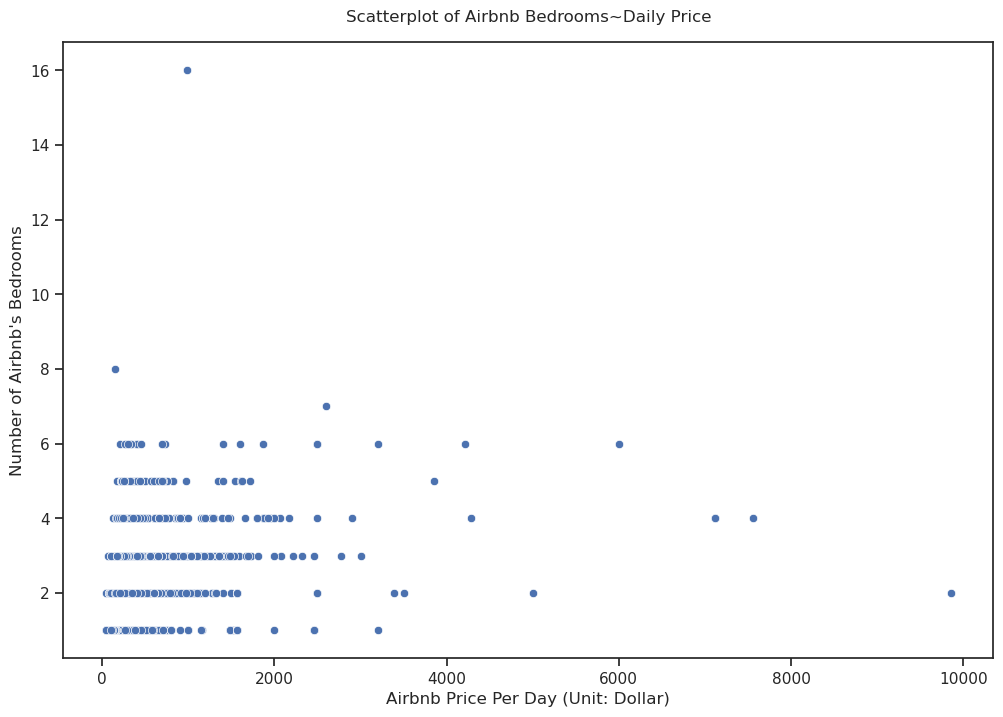

In [19]:
plt.figure(figsize=(12,8))
#plot the scatter plot to see the relationship between prices and numbers of bedrooms
sn.scatterplot(
    x="price",
    y="bedrooms",  
    data=airbnb_data)
plt.ylabel('Number of Airbnb\'s Bedrooms')
plt.xlabel('Airbnb Price Per Day (Unit: Dollar)')
plt.title('Scatterplot of Airbnb Bedrooms~Daily Price', y=1.02)
plt.savefig('Scatterplot_Airbnb_Bedrooms~Price.png') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Figure size 1200x1000 with 0 Axes>

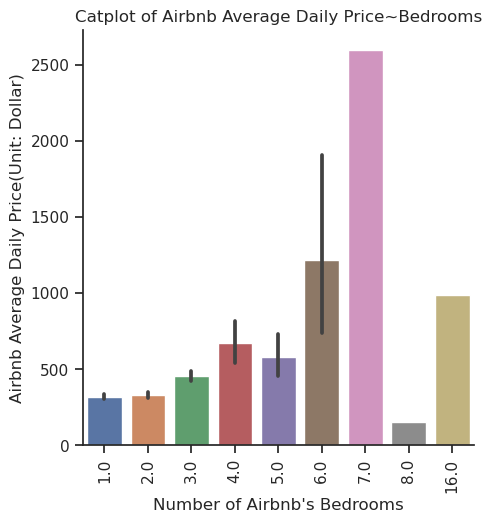

In [20]:
plt.figure(figsize=(12,10))
sn.catplot(x='bedrooms',y='price',data=airbnb_data,kind='bar')
plt.xticks(rotation=90)
#the black vertical line on some bars represent the variablity and uncertianty in the data 
#the longer the line the more disperse the data is 
plt.xlabel('Number of Airbnb\'s Bedrooms')
plt.ylabel('Airbnb Average Daily Price(Unit: Dollar)')
plt.title('Catplot of Airbnb Average Daily Price~Bedrooms')
plt.savefig('Catplot_Airbnb_Price~Bedrooms.png')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


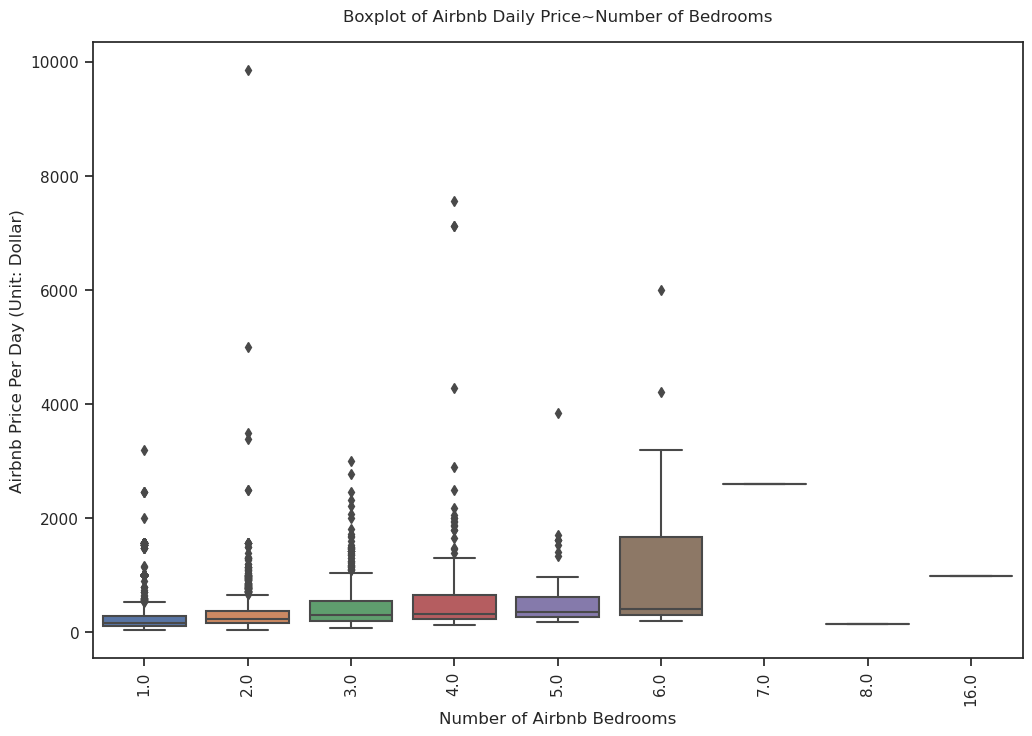

In [21]:
plt.figure(figsize=(12,8))
sn.boxplot(x='bedrooms',y='price',data=airbnb_data)
xt=plt.xticks(rotation=90)
plt.ylabel('Airbnb Price Per Day (Unit: Dollar)')
plt.xlabel('Number of Airbnb Bedrooms')
plt.xticks(rotation=90)
plt.title('Boxplot of Airbnb Daily Price~Number of Bedrooms', y=1.02)
plt.savefig('Boxplot_Airbnb_Price_Bedrooms.png') 

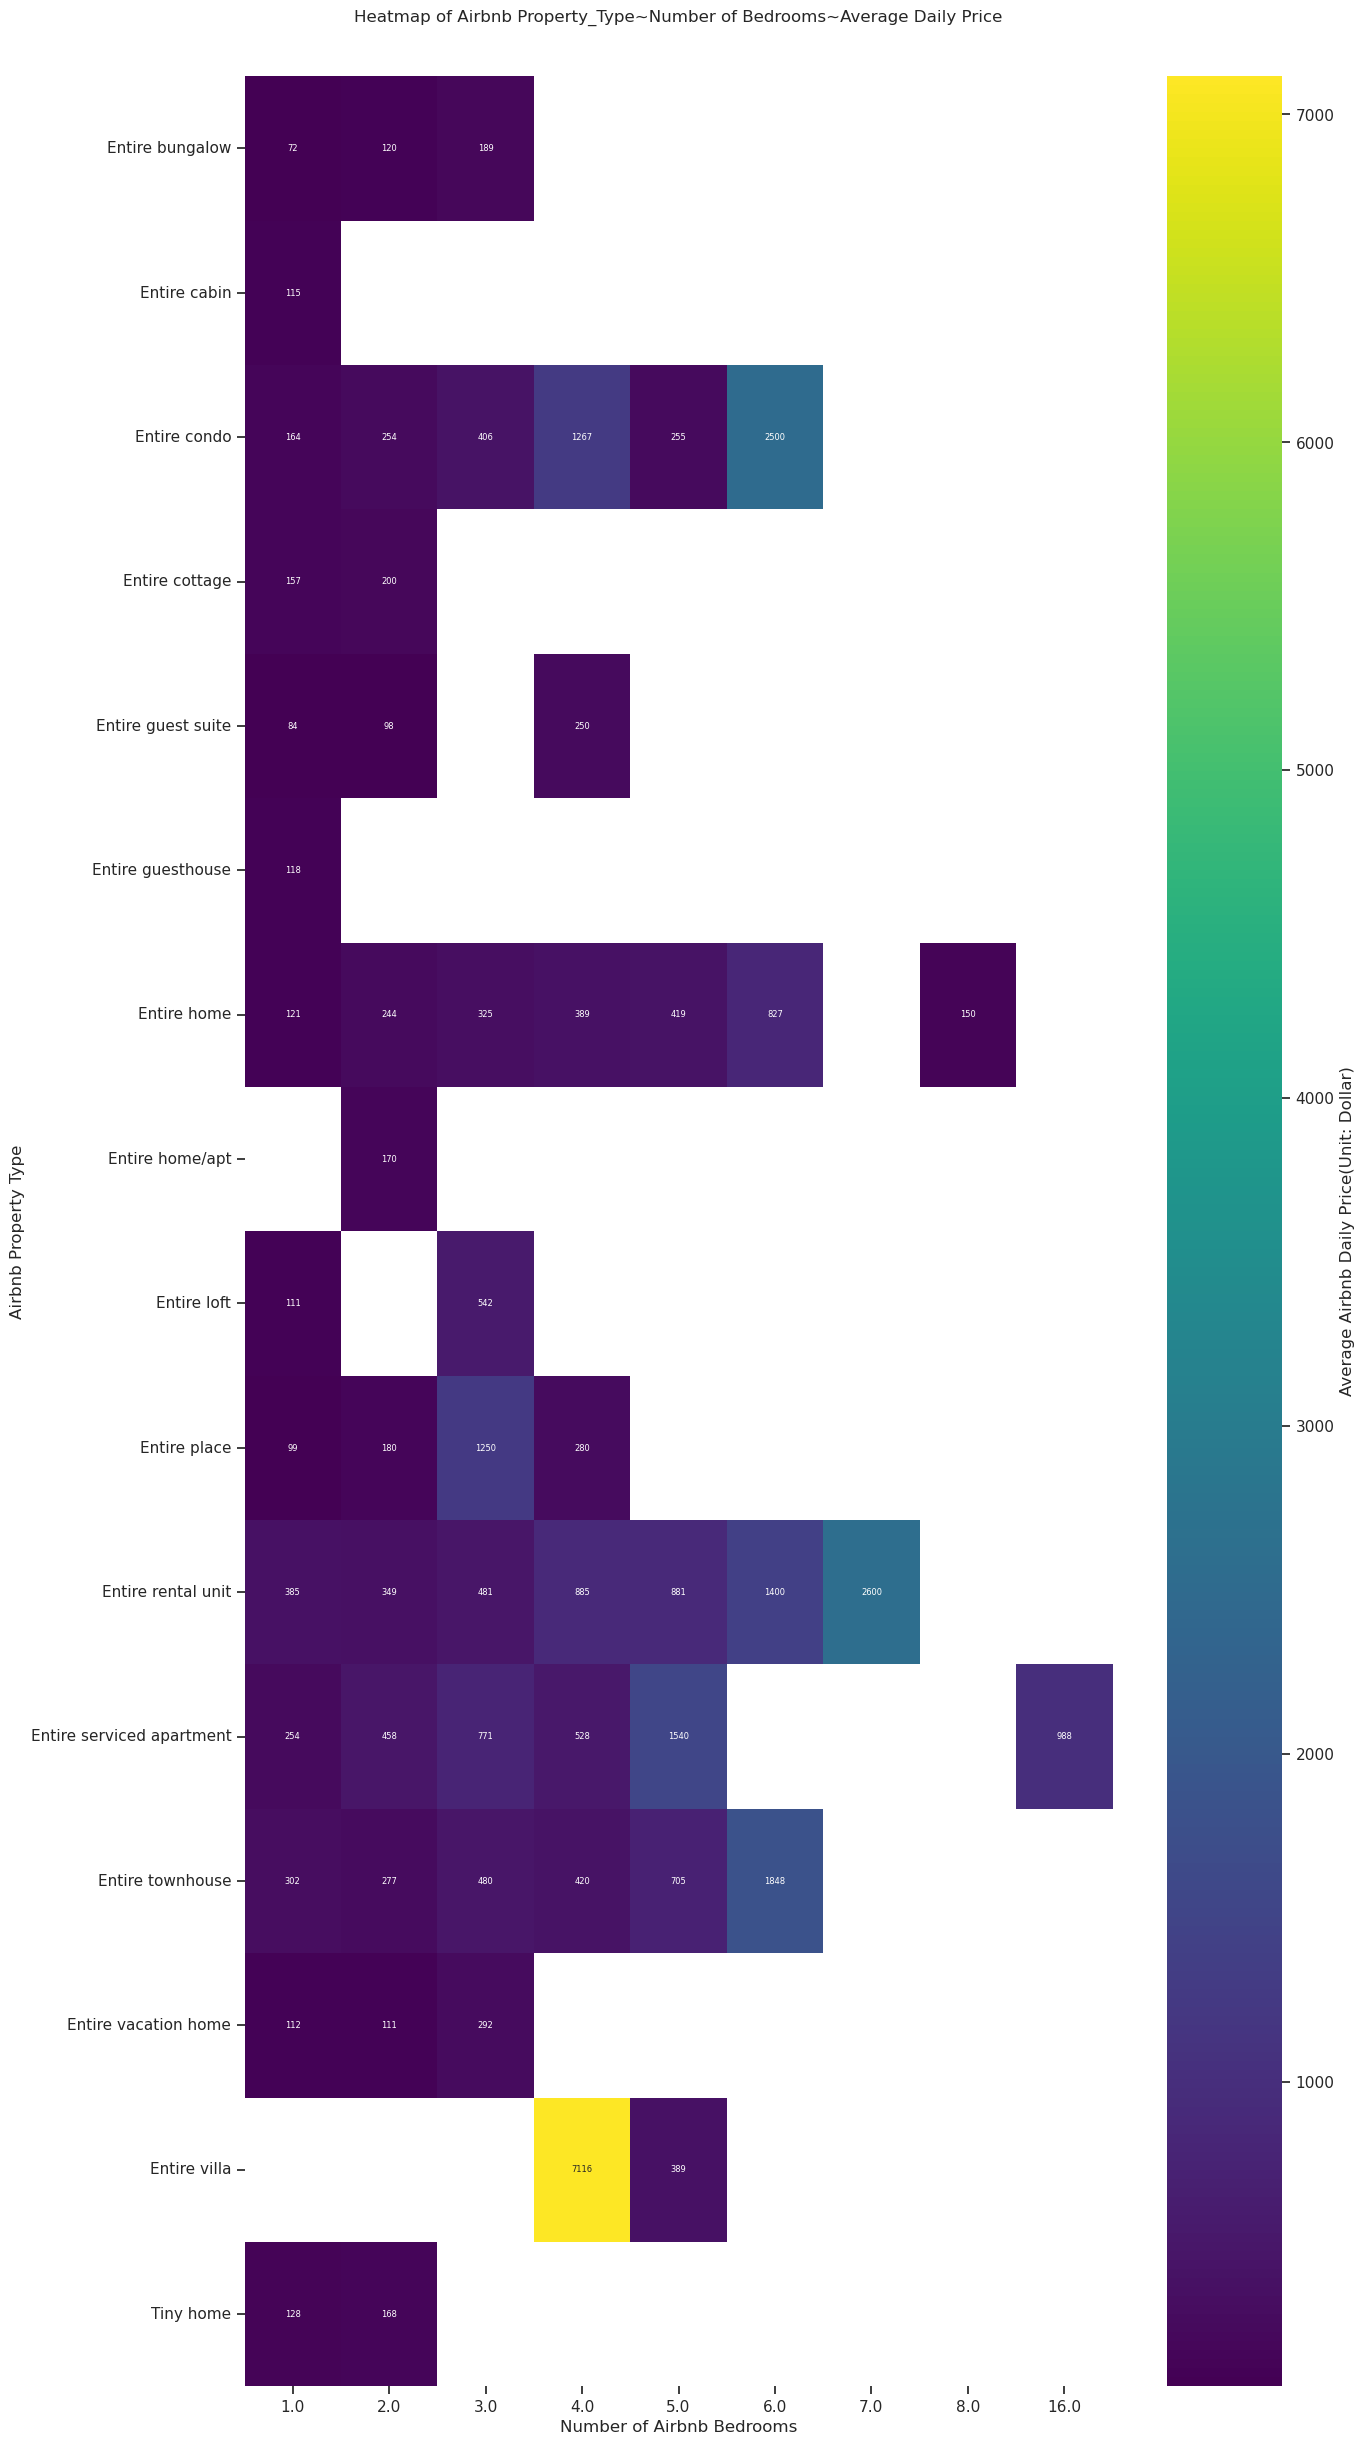

In [22]:
#plotting the heatmap of average price of airbnb in different property types with numbers of bedrooms 
# the deep yellow color here means the combination of property types and numbers of bedrooms which has the highest average price per day
plt.figure(figsize=(14, 30))

# Generate the heatmap with smaller annotations to fit more property types
price_mean = airbnb_data.groupby(['property_type', 'bedrooms'])['price'].mean().unstack()
ax=sn.heatmap(price_mean, annot=True, fmt='.0f', annot_kws={"size": 6},cmap='viridis')
plt.yticks(rotation=0)
plt.ylabel('Airbnb Property Type')
plt.xlabel('Number of Airbnb Bedrooms')
plt.title('Heatmap of Airbnb Property_Type~Number of Bedrooms~Average Daily Price', y=1.02)
colorbar = ax.collections[0].colorbar
colorbar.set_label('Average Airbnb Daily Price(Unit: Dollar)')
#annotation means the average price of that property type which has certain number of bedrooms
plt.savefig('Heatmap_Airbnb_Propertytype~Bedrooms~Averageprice.png') 

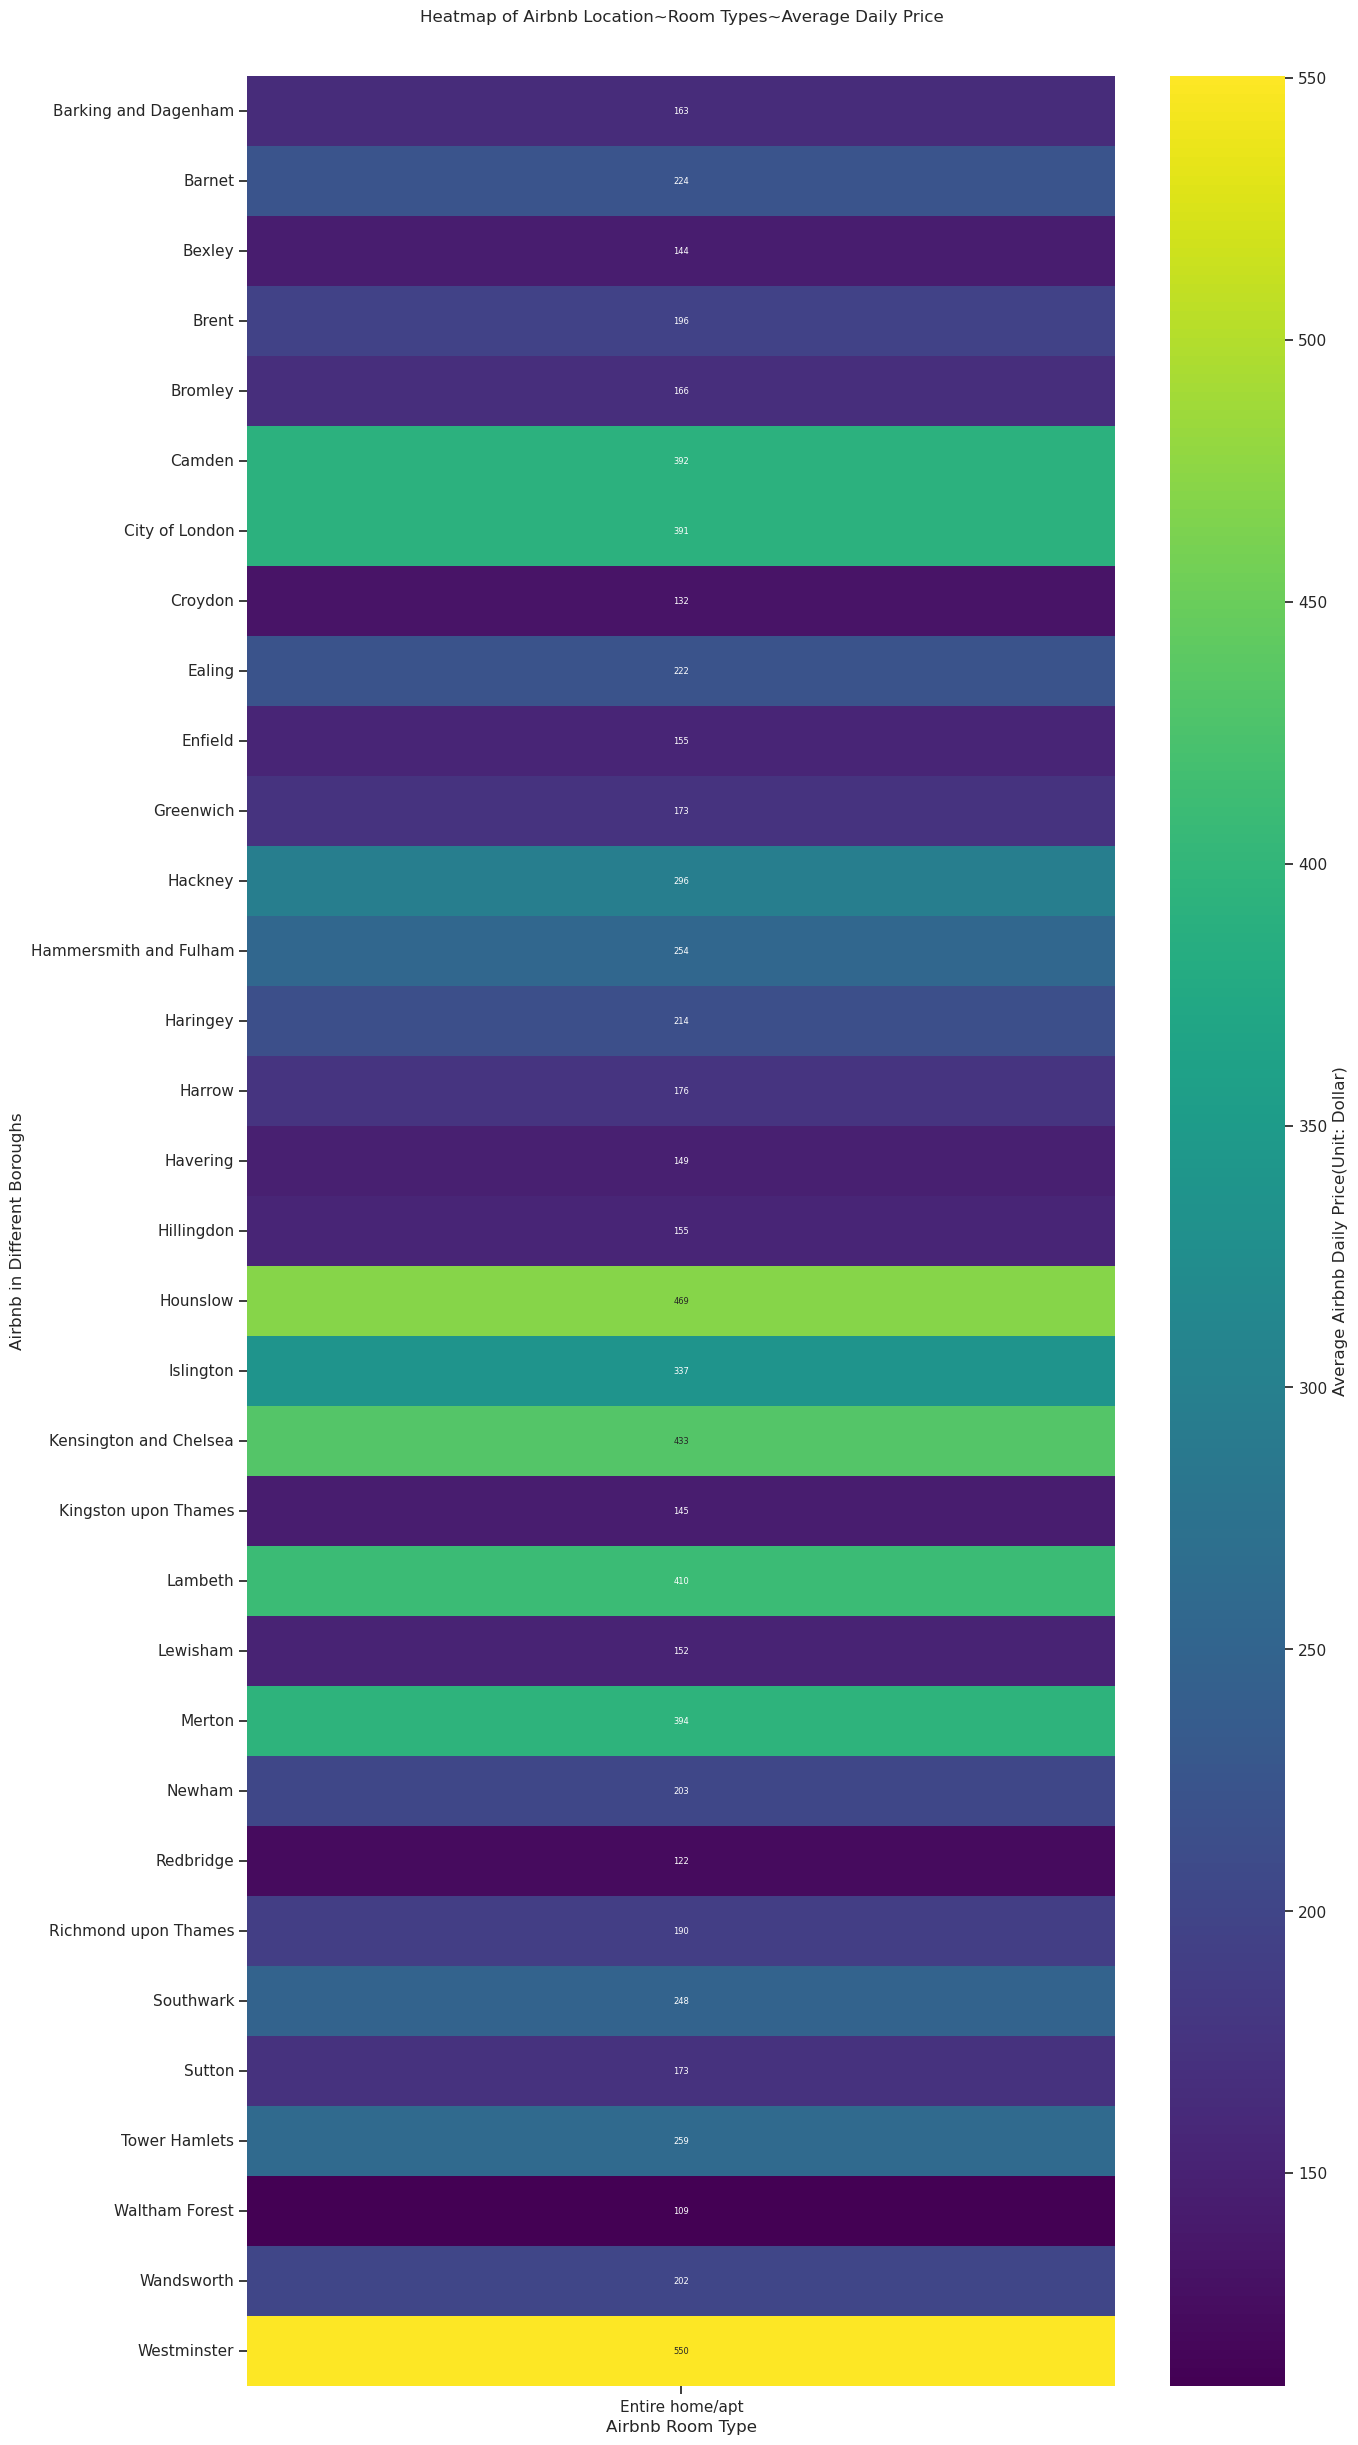

In [23]:
#plotting the heatmap of average price of airbnb in different with specific room types 
# the deep yellow color here means the combination of borough and room types which has the highest average price per day
plt.figure(figsize=(14, 30))

# Generate the heatmap with smaller annotations to fit more property types
price_mean = airbnb_data.groupby(['neighbourhood_cleansed', 'room_type'])['price'].mean().unstack()
ax=sn.heatmap(price_mean, annot=True, fmt='.0f', annot_kws={"size": 6},cmap='viridis')
plt.yticks(rotation=0)
plt.ylabel('Airbnb in Different Boroughs')
plt.xlabel('Airbnb Room Type')
plt.title('Heatmap of Airbnb Location~Room Types~Average Daily Price', y=1.02)
colorbar = ax.collections[0].colorbar
colorbar.set_label('Average Airbnb Daily Price(Unit: Dollar)')
#annotation means the average price of that property type which has certain number of bedrooms
plt.savefig('Heatmap_Airbnb_Location_Propertytype_Averageprice.png') 

In [24]:
print(airbnb_data['property_type'].unique())

['Entire rental unit' 'Entire home' 'Entire townhouse'
 'Entire serviced apartment' 'Entire condo' 'Entire loft'
 'Entire guest suite' 'Entire cabin' 'Entire guesthouse' 'Tiny home'
 'Entire villa' 'Entire cottage' 'Entire bungalow' 'Entire home/apt'
 'Entire vacation home' 'Entire place']


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


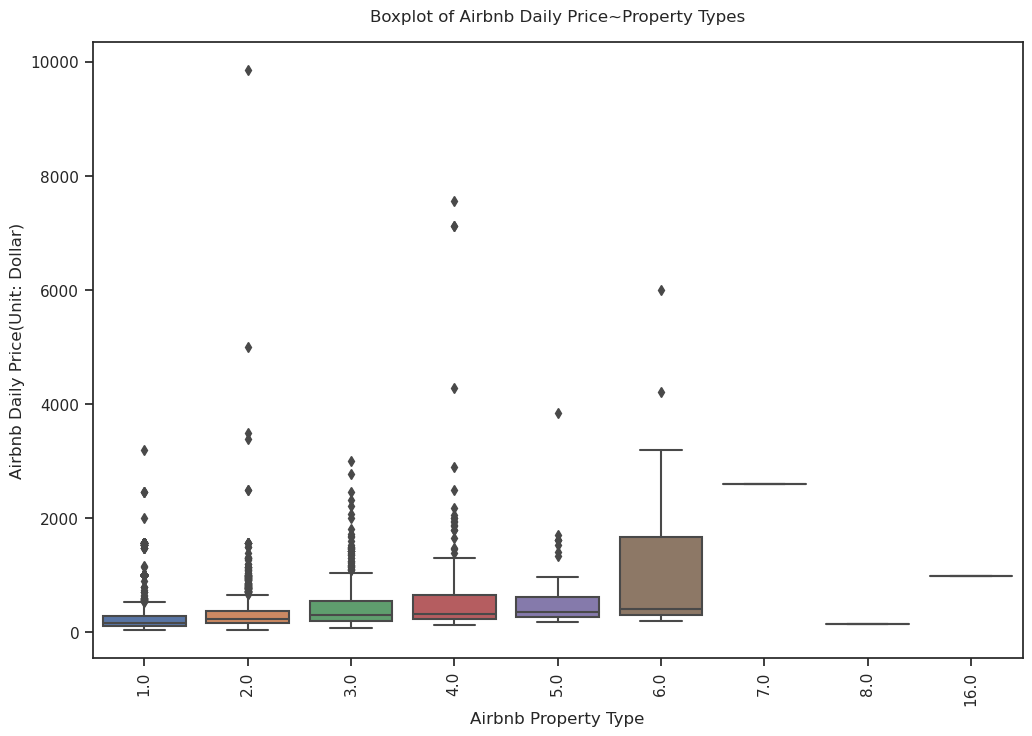

In [25]:
plt.figure(figsize=(12,8))
sn.boxplot(x='bedrooms',y='price',data=airbnb_data)
xt=plt.xticks(rotation=90)
plt.ylabel('Airbnb Daily Price(Unit: Dollar)')
plt.xlabel('Airbnb Property Type')
plt.xticks(rotation=90)
plt.title('Boxplot of Airbnb Daily Price~Property Types', y=1.02)
plt.savefig('Boxplot_Airbnb_Price~Property_Types.png') 

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


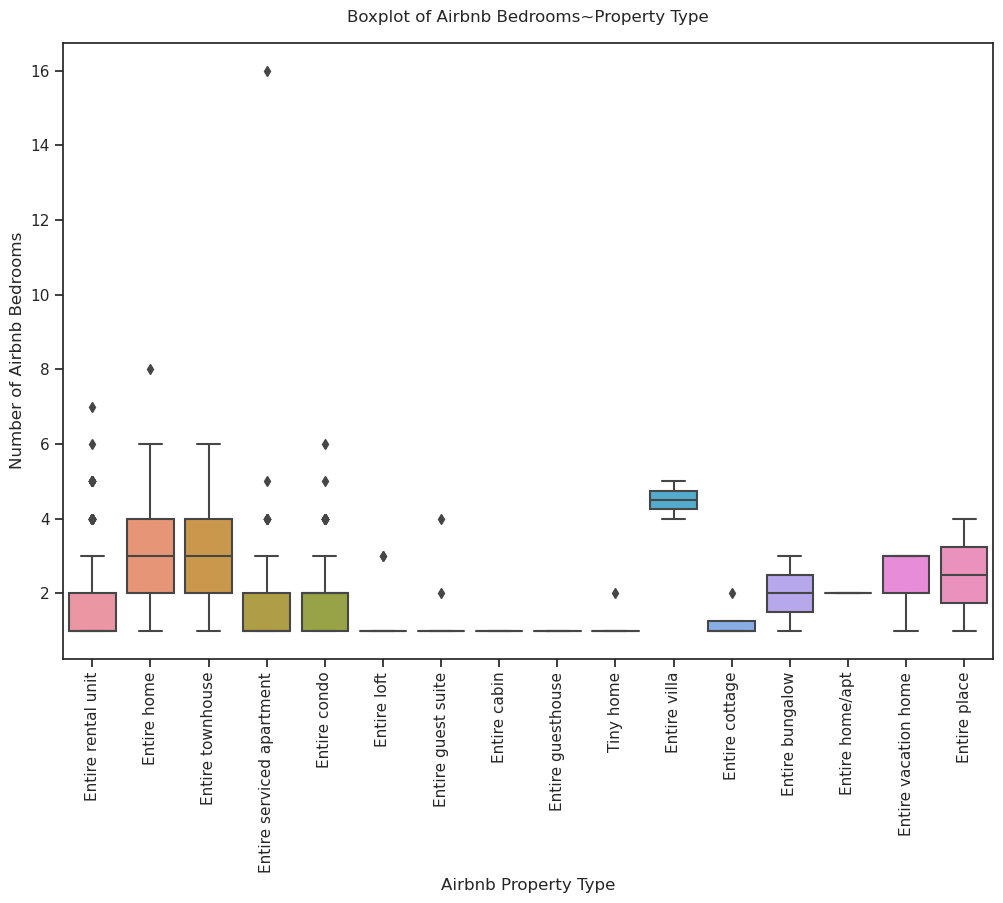

In [26]:
plt.figure(figsize=(12,8))
sn.boxplot(x='property_type',y='bedrooms',data=airbnb_data)
xt=plt.xticks(rotation=90)
plt.ylabel('Number of Airbnb Bedrooms')
plt.xlabel('Airbnb Property Type')
plt.xticks(rotation=90)
plt.title('Boxplot of Airbnb Bedrooms~Property Type', y=1.02)
plt.savefig('Boxplot_Airbnb_Bedroom~Property_Types.png') 

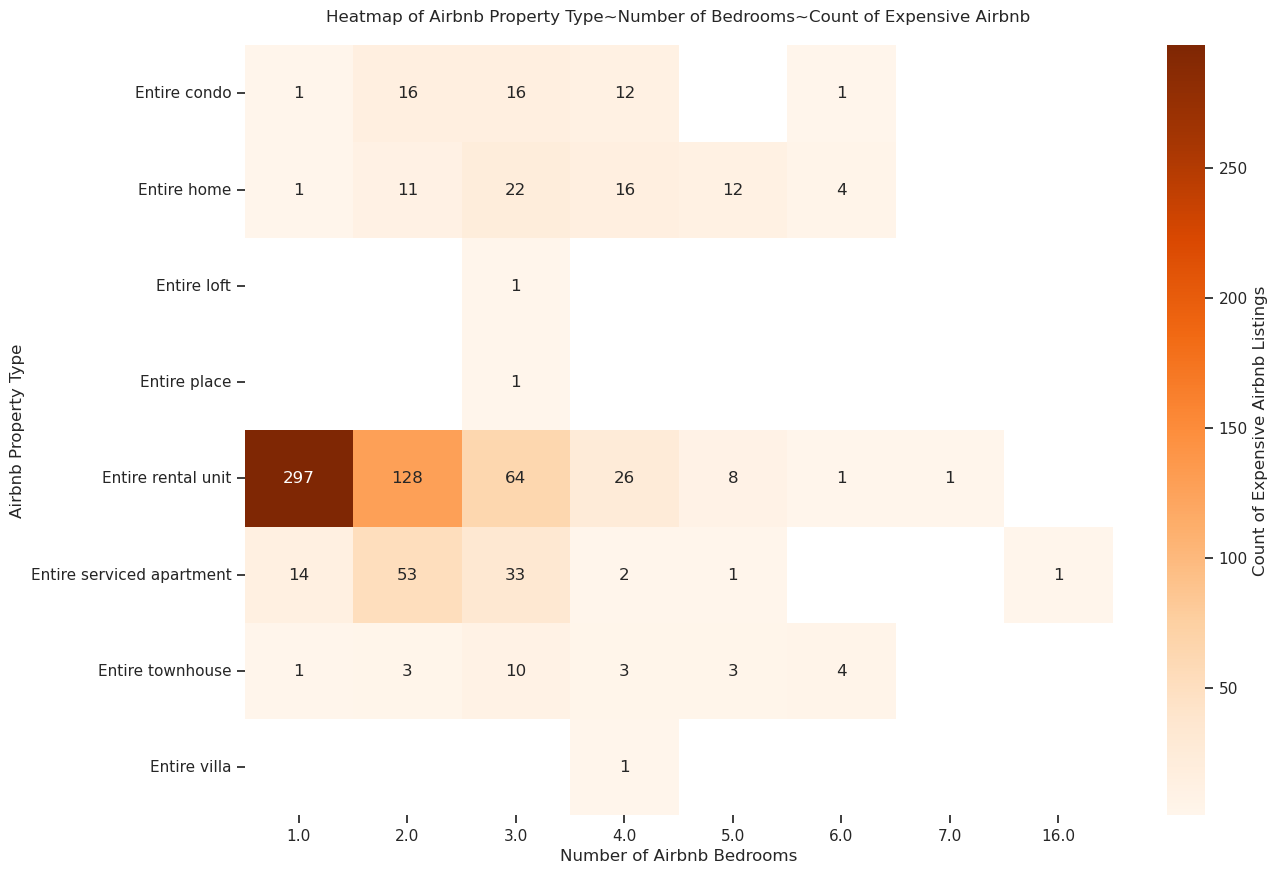

In [27]:
#plotting a heatmap showing the airbnb property type of certain numbers of bedroom has the most count of
#high daily price(price>500)
airbnb_data_filtered = airbnb_data[airbnb_data['price'] >=500]
# Group by 'property_type' and 'bedrooms', and get the count of 'price'
grouped = airbnb_data_filtered.groupby(['property_type', 'bedrooms'])['price'].count().reset_index(name='count')
# Pivot the DataFrame for the heatmap
pivot_table = grouped.pivot(index='property_type', columns='bedrooms', values='count')
# Create the heatmap
f, ax = plt.subplots(figsize=(14, 10))
heatmap=sn.heatmap(pivot_table, cmap='Oranges', annot=True, fmt='.0f')
plt.xlabel('Number of Airbnb Bedrooms')
plt.ylabel('Airbnb Property Type')
cbar =heatmap.collections[0].colorbar
cbar.set_label('Count of Expensive Airbnb Listings')
plt.title('Heatmap of Airbnb Property Type~Number of Bedrooms~Count of Expensive Airbnb', y=1.02)
plt.savefig('Heatmap_Airbnb_Property_type~bedrooms~Count_of_Expensive_Airbnb.png') 
                                                 

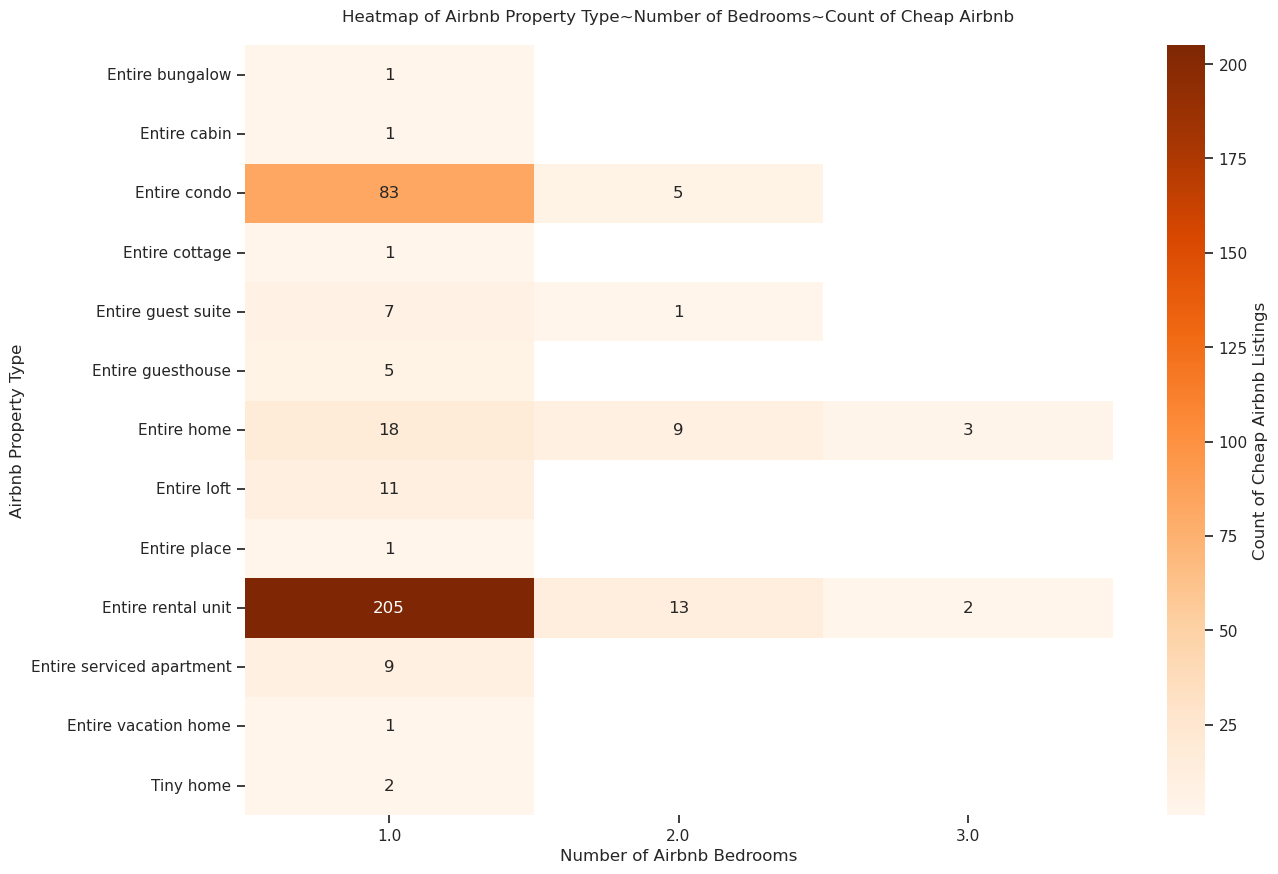

In [28]:
#plotting a heatmap showing the airbnb property type of certain numbers of bedroom has the most count of
#high daily price(price>500)
airbnb_data_filtered = airbnb_data[airbnb_data['price'] <=100]
# Group by 'property_type' and 'bedrooms', and get the count of 'price'
grouped = airbnb_data_filtered.groupby(['property_type', 'bedrooms'])['price'].count().reset_index(name='count')
# Pivot the DataFrame for the heatmap
pivot_table = grouped.pivot(index='property_type', columns='bedrooms', values='count')
# Create the heatmap
f, ax = plt.subplots(figsize=(14, 10))
heatmap=sn.heatmap(pivot_table, cmap='Oranges', annot=True, fmt='.0f')
cbar =heatmap.collections[0].colorbar
cbar.set_label('Count of Cheap Airbnb Listings')
plt.xlabel('Number of Airbnb Bedrooms')
plt.ylabel('Airbnb Property Type')
plt.title('Heatmap of Airbnb Property Type~Number of Bedrooms~Count of Cheap Airbnb', y=1.02)
plt.savefig('Heatmap_Airbnb_Property_type~bedrooms~Count_of_Cheap_Airbnb.png') 

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


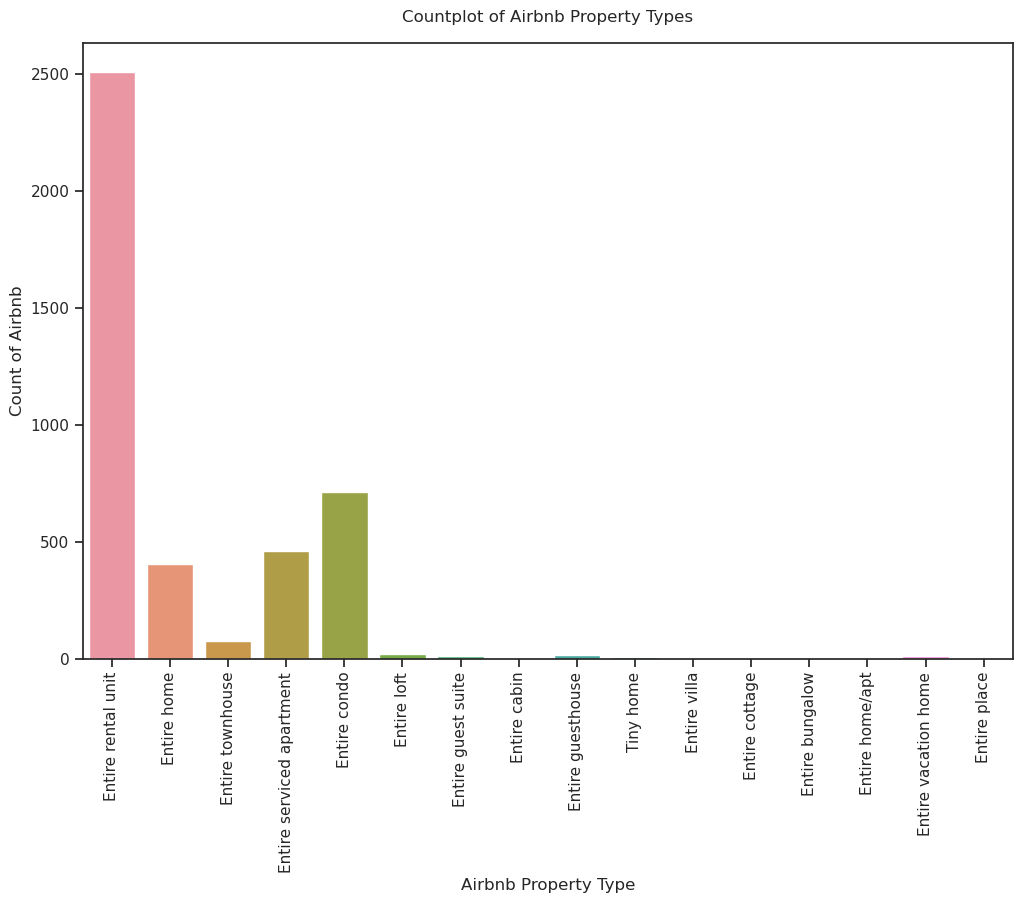

In [29]:
plt.figure(figsize=(12,8))
sn.countplot(x="property_type", data=airbnb_data)
plt.xticks(rotation=90)
plt.ylabel('Count of Airbnb')
plt.xlabel('Airbnb Property Type')
plt.title('Countplot of Airbnb Property Types', y=1.02)
plt.savefig('Countplot_Airbnb_Property_Types.png') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


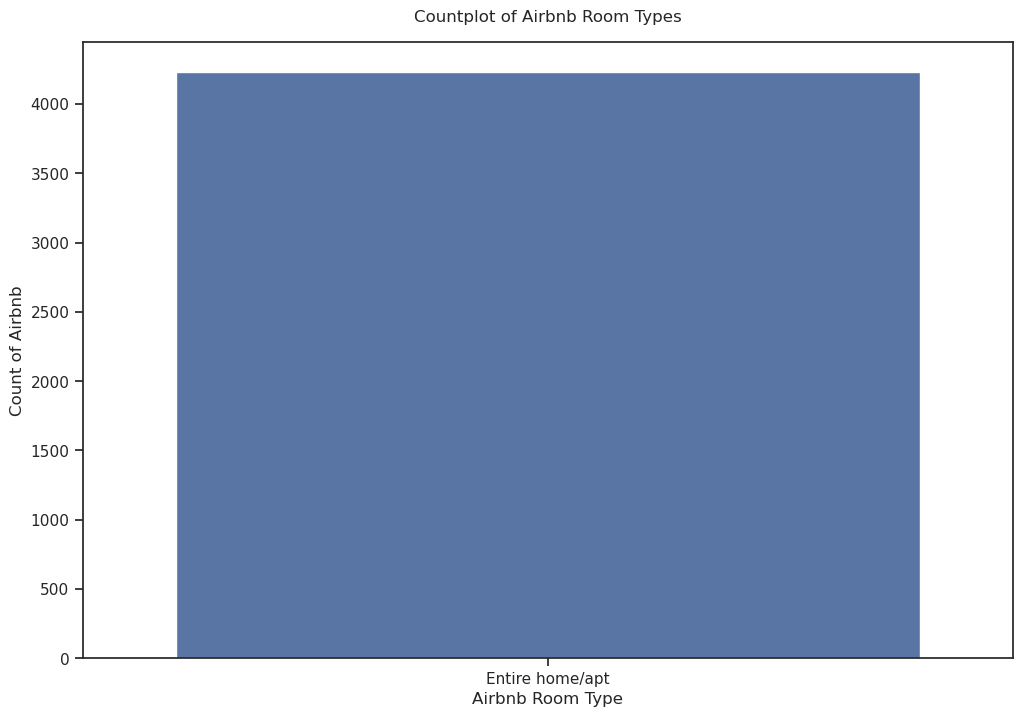

In [30]:
plt.figure(figsize=(12,8))
sn.countplot(x="room_type", data=airbnb_data)
plt.ylabel('Count of Airbnb')
plt.xlabel('Airbnb Room Type')
plt.title('Countplot of Airbnb Room Types', y=1.02)
plt.savefig('Countplot__Room_Types.png') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

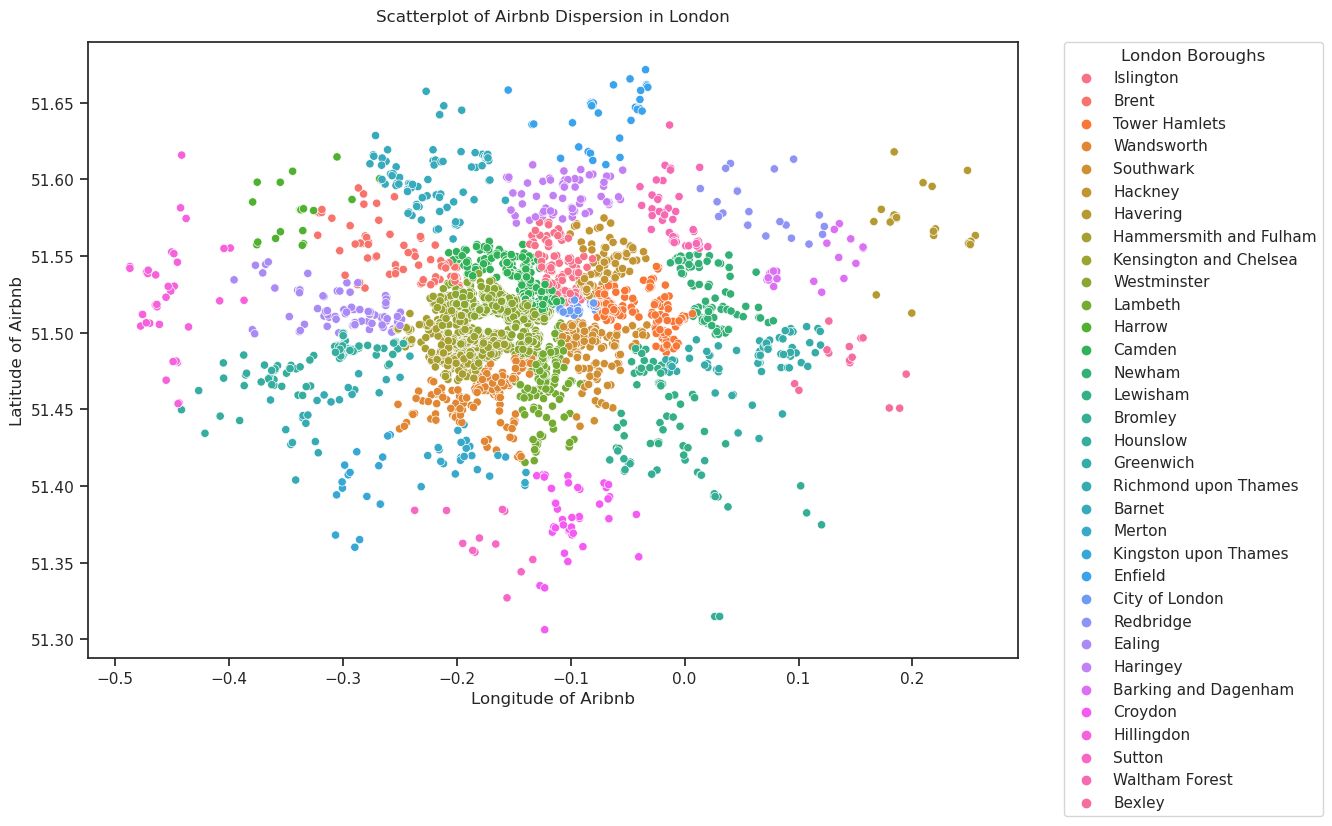

In [31]:
plt.figure(figsize=(12,8))
sn.scatterplot(data=airbnb_data, x='longitude', y='latitude', hue='neighbourhood_cleansed')
plt.ylabel('Latitude of Airbnb')
plt.xlabel('Longitude of Aribnb')
plt.title('Scatterplot of Airbnb Dispersion in London', y=1.02)
# Place the legend outside the plot
legend = plt.legend(title='London Boroughs', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('Scatterplot_Airbnb_Dispersion.png', bbox_inches='tight') 
plt.show()

In [32]:
#An interactive map that visually represents the density of Airbnb listings in the area around the specified coordinates. 
#Denser areas with more Airbnb listings will appear with colors closer to red in the specified gradient
#while less dense areas will appear blue, purple, or orange, depending on their concentration.
map = folium.Map([51.5074,-0.1278],zoom_start=11)
#the exact longitude and latitude of London Area is search from Google


#Add a heatmap layer to the map which visualizes the density of Airbnb listings based on their geographical locations.
#Also defines the color scheme of the heatmap while lower density areas in blue and higher in red 
HeatMap(airbnb_data[['latitude','longitude']].dropna(),
        radius=10,
        gradient={0.2:'blue',
                  0.4:'purple',
                  0.6:'orange',
                  1.0:'red'}).add_to(map)
display(map)
map.save("Interactivemap_Airbnb_listings_.html")
#Noting here, for Juptyer notebook users you will see an interactive map which can be zoomed in as it's in html format
#for other users using traditional ide users they can't see it

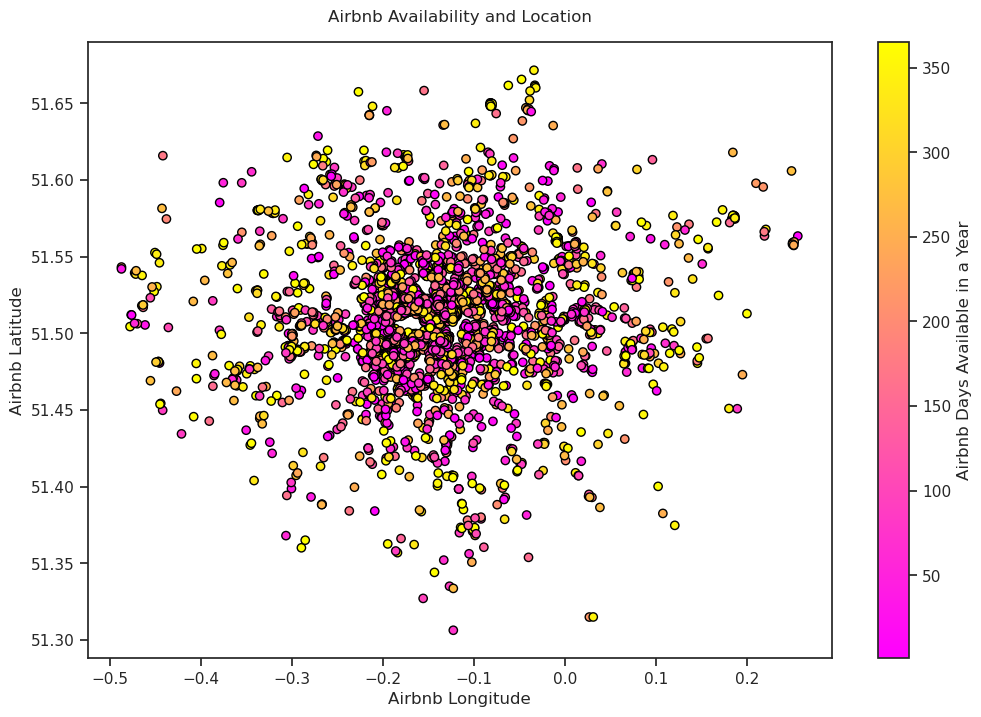

In [33]:
plt.figure(figsize=(12,8))

plt.scatter(airbnb_data.longitude,
           airbnb_data.latitude,
            c=airbnb_data.availability_365,
            cmap="spring",
            edgecolors="black",
            linewidths=1,
            alpha=1
           )
cbar = plt.colorbar()
cbar.set_label("Airbnb Days Available in a Year")
plt.xlabel('Airbnb Longitude')
plt.ylabel('Airbnb Latitude')
plt.title('Airbnb Availability and Location',y=1.02)
plt.savefig('Scatterplot_Airbnb_location_Availability.png', bbox_inches='tight') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

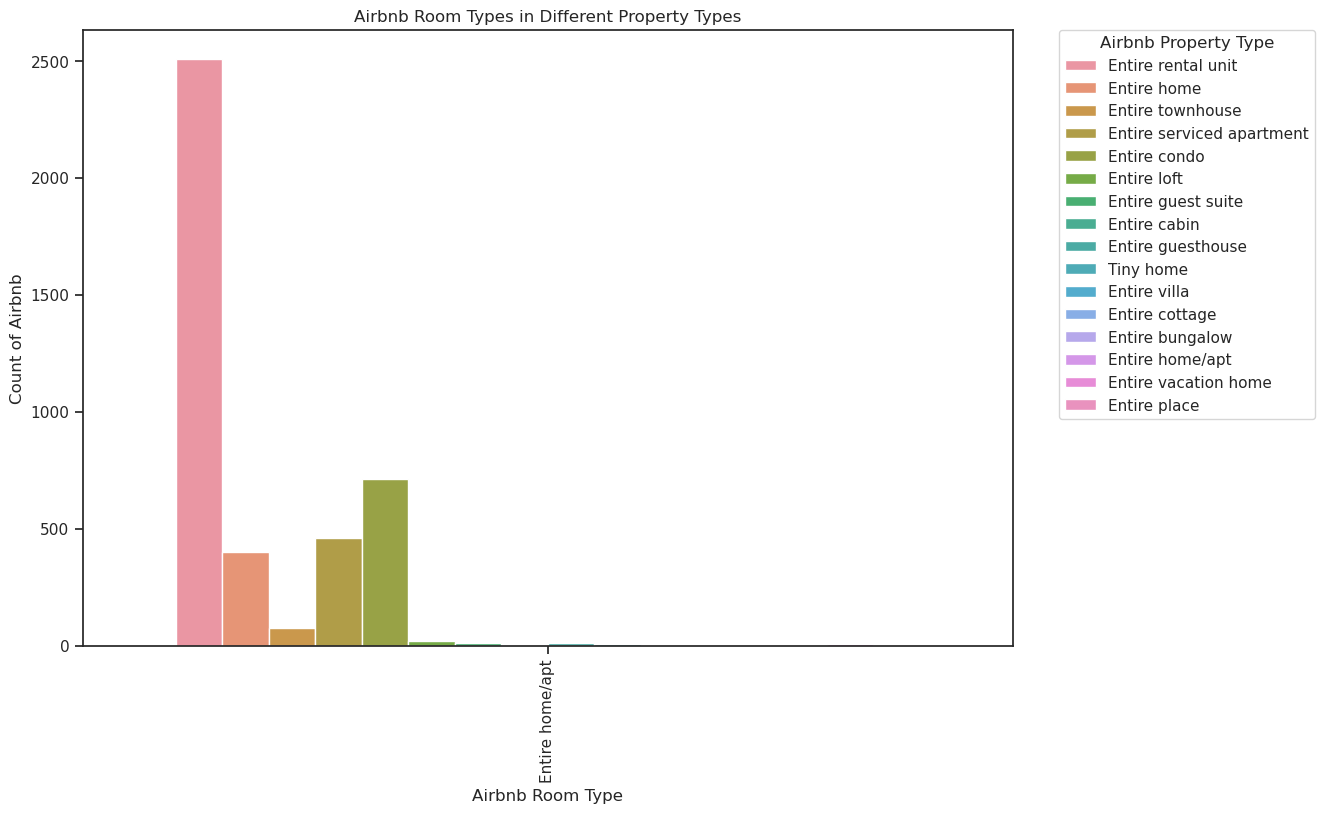

In [34]:
plt.figure(figsize=(12,8))
sn.countplot(
    data = airbnb_data,
    x="room_type",
    hue="property_type"
)
plt.xticks(rotation=90)
plt.ylabel('Count of Airbnb')
plt.xlabel('Airbnb Room Type')
legend = plt.legend(title='Airbnb Property Type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Airbnb Room Types in Different Property Types")
plt.savefig('Countplot_Airbnb_Roomtype_Propertytype_Dispersion.png', bbox_inches='tight') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

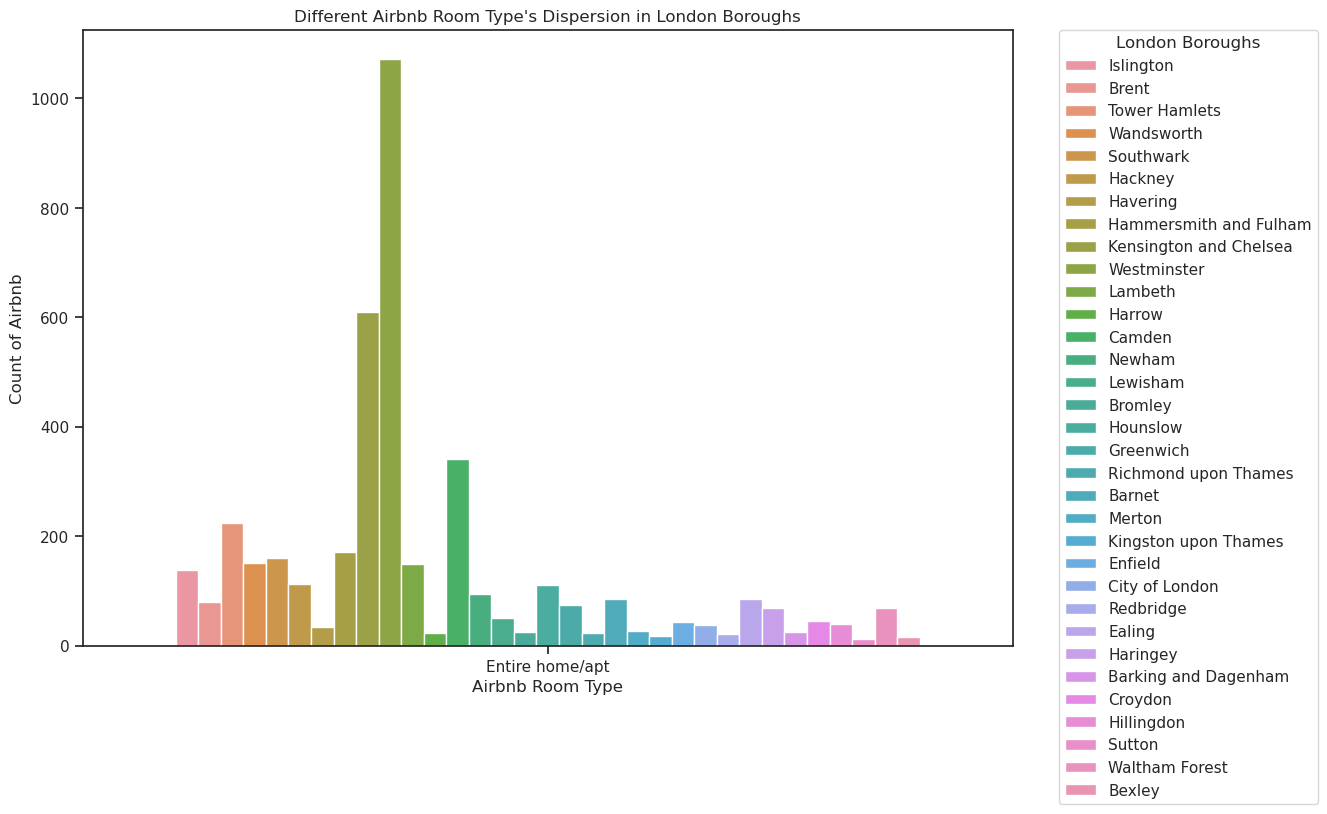

In [35]:
plt.figure(figsize=(12,8))

sn.countplot(
    data = airbnb_data,
    x="room_type",
    hue="neighbourhood_cleansed"
)
plt.ylabel('Count of Airbnb')
plt.xlabel('Airbnb Room Type')
legend = plt.legend(title='London Boroughs', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Different Airbnb Room Type's Dispersion in London Boroughs")
plt.savefig('Countplot_Airbnb_Roomtype_Neighbourhoodgroup_Dispersion.png', bbox_inches='tight') 
plt.show()

<Figure size 1000x600 with 0 Axes>

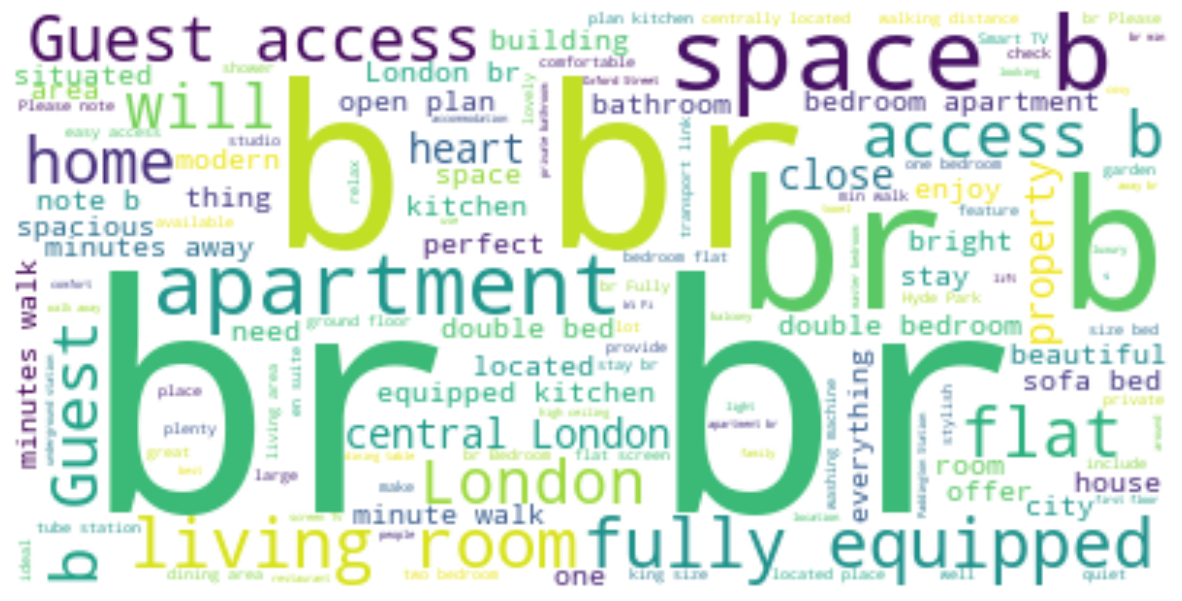

In [36]:
#Combining all entries from the name column of the airbnb_data DataFrame into a single string, with each name converted to a string
text = " ".join(str(each) for each in airbnb_data.description)
#Creating a WordCloud object with a maximum of 200 words to be included in the word cloud
#set the background color of the word cloud to white
wordcloud = WordCloud(
    max_words=200,
    background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
#Displaying the generated word cloud image on the current figure with bilinear interpolation, which smooths the displayed image
plt.imshow(wordcloud, interpolation="Bilinear")
plt.savefig('Airbnb_Description_Keyword.png', bbox_inches='tight') 
plt.axis("off")
plt.show()#overall we're plotting the keyword for the airbnb's name here

In [37]:
#Plotting the area which has the most revies and each marker in the map represents an individual Airbnb listing
# By zooming in, more markers become visible and you can more information about the distribution of listings. 
#and the map is focused on the central London area as hte point is specifically near the Charing Cross area 
Longitude=-0.1278
Latitude=51.5074

#This creates a new Folium map centered at the central lodon 
map = folium.Map([Latitude, Longitude], zoom_start=10)

#Initialize a marker cluster and adds it to the map. Marker clusters can help manage the clusters at different locations. 
#When many markers are close together, they are grouped into a cluster.
reviews_map = plugins.MarkerCluster().add_to(map)

#Loop iterates over the latitude, longitude, and name of each Airbnb listing.
#For each listing, a marker will be created on the map with an icon and a popup label which is the name of the listing.
for lat, lon, label in zip(airbnb_data.latitude,airbnb_data.longitude,airbnb_data.name):
    folium.Marker(location=[lat, lon],icon=folium.Icon(icon="home"),
                 popup=label).add_to(reviews_map)

#Add the marker cluster to the map
map.add_child(reviews_map)
display(map)
reviews_map.save("Interactive_Map_Most_Reviews.html")

AttributeError: 'DataFrame' object has no attribute 'name'

In [ ]:
housing_data

/tmp/ipykernel_162194/4075221757.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(housing_data['Average'])  # histogram for housing price
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

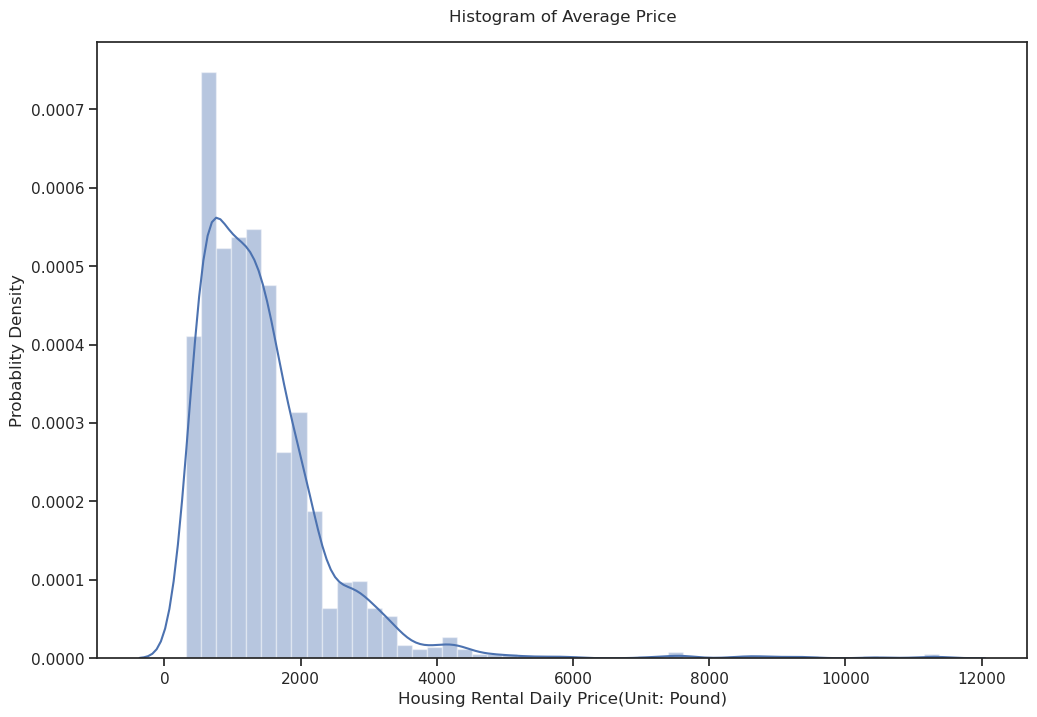

In [38]:
"""
===
Diagrams and histograms to visualize the results
===
"""
plt.figure(figsize=(12,8))
sn.distplot(housing_data['Average'])  # histogram for housing price
plt.title('Histogram of Average Price', y=1.02)
plt.ylabel('Probablity Density')
plt.xlabel('Housing Rental Daily Price(Unit: Pound)')
plt.savefig('Histogram_Housing_Price.png', bbox_inches='tight') 
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


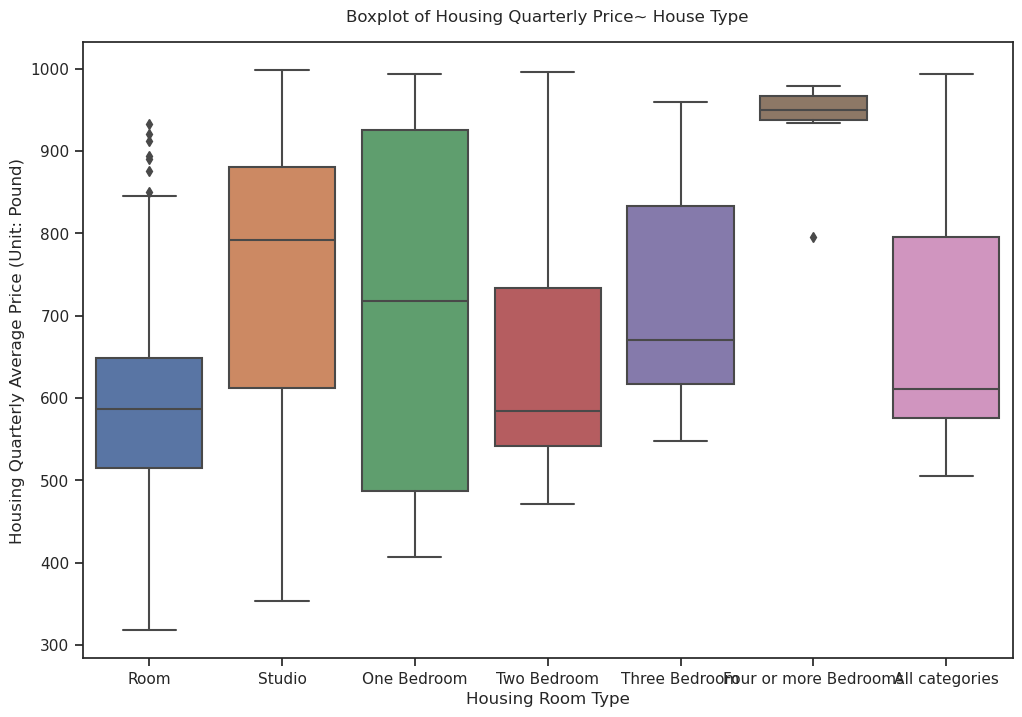

In [39]:
plt.figure(figsize=(12,8))
sn.boxplot(x = 'Category',
            y = 'Average',
            data=housing_data[housing_data.Average<=1000]
           )
plt.ylabel('Housing Quarterly Average Price (Unit: Pound)')
plt.xlabel('Housing Room Type')
plt.title("Boxplot of Housing Quarterly Price~ House Type",y=1.02)
plt.savefig('Boxplot_Housing_Average_Price~Roomtype.png', bbox_inches='tight') 
plt.show()

In [ ]:
#average_prices_by_borough_year = housing_data.groupby(['Area', 'Year'])['Average']

In [ ]:
#average_prices_by_borough_year.head()

In [40]:
year_data_type = housing_data['Year'].dtype
print(year_data_type)

int64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

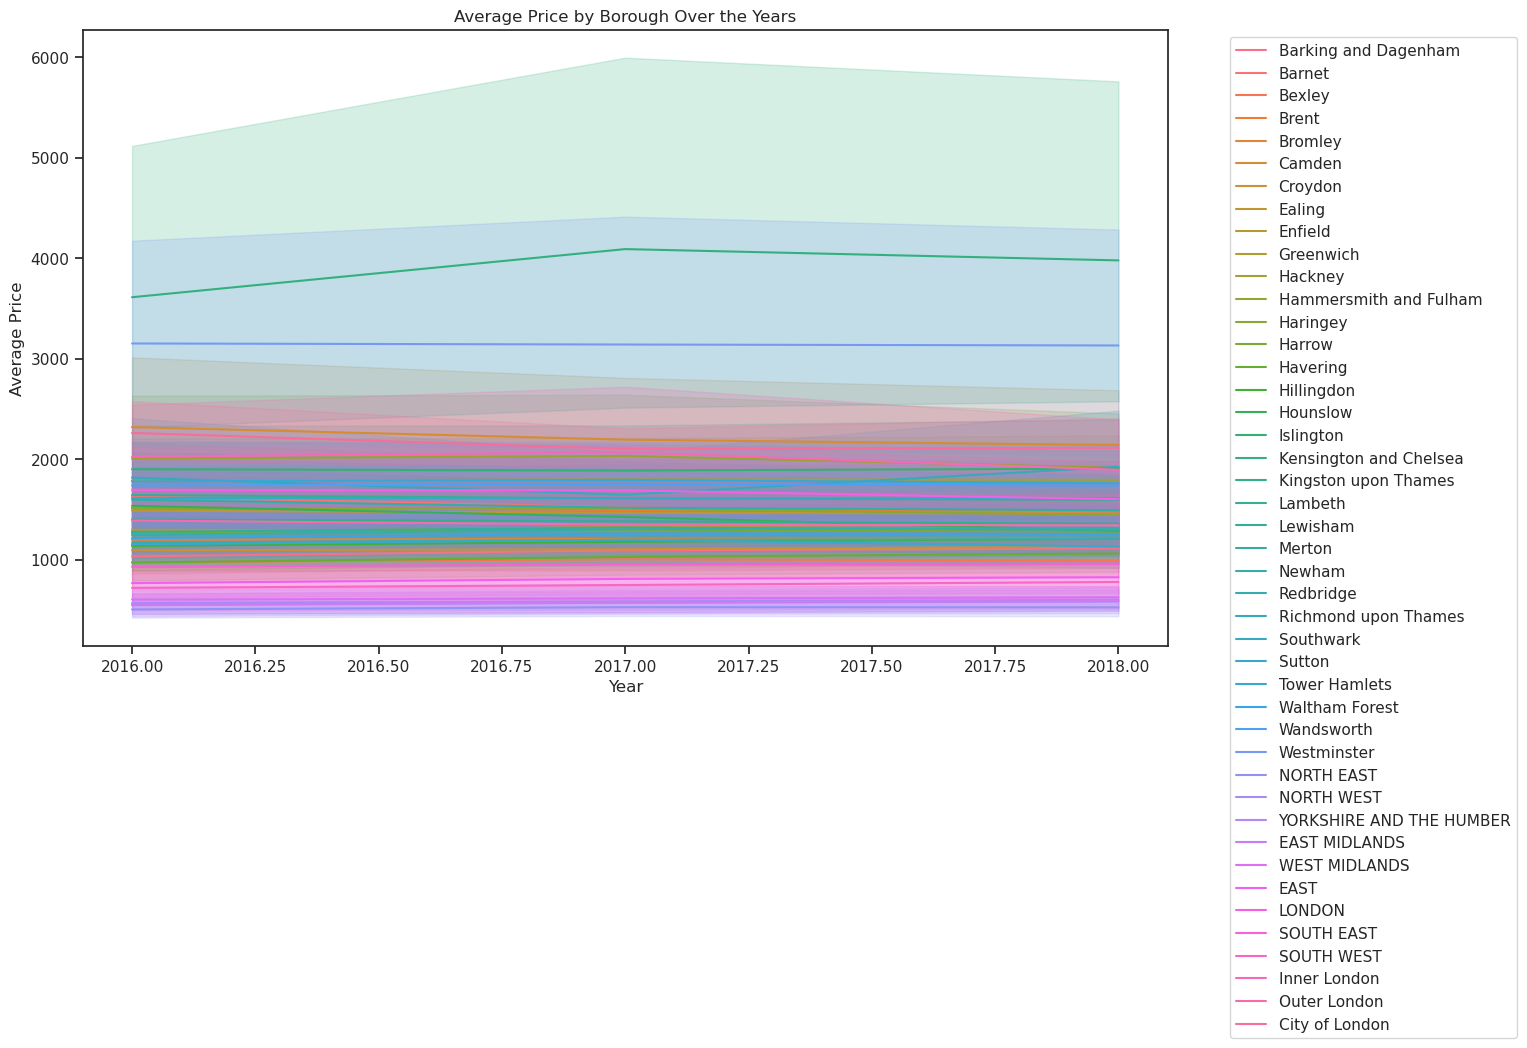

In [41]:
housing_data['Year'] = housing_data['Year'].astype(int)

plt.figure(figsize=(14, 8))
sn.lineplot(x='Year', y='Average', hue='Area', data=housing_data)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Borough Over the Years')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


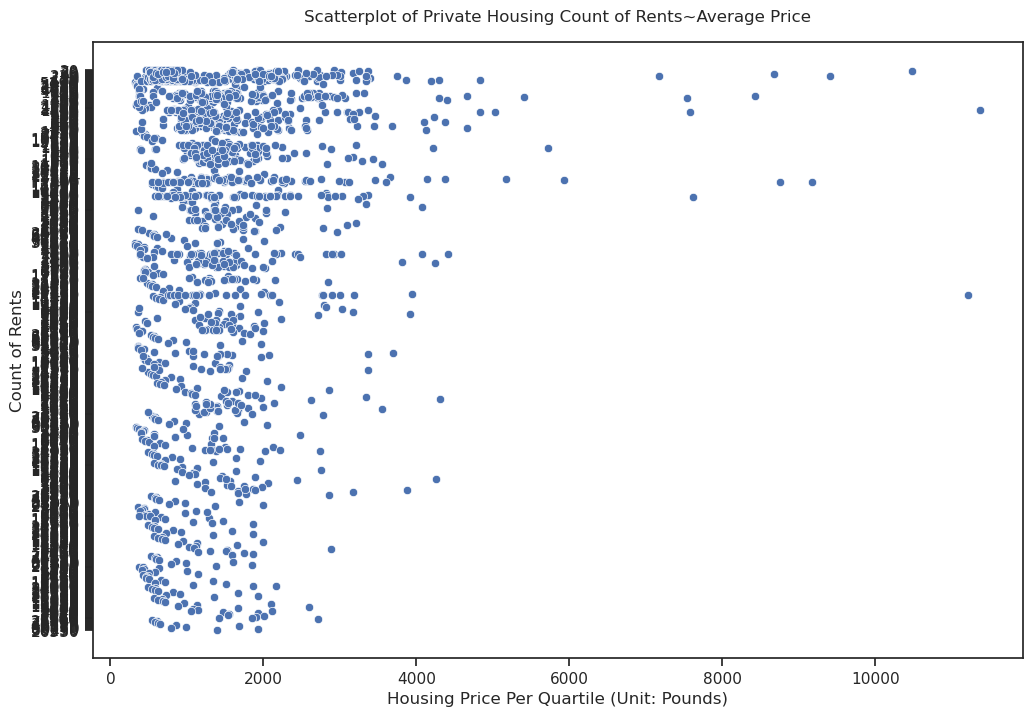

In [42]:
plt.figure(figsize=(12,8))
#plot the scatter plot to see the relationship between Average Price and Count of Rents
sn.scatterplot(
    x="Average",
    y="Count of rents",  
    data=housing_data)
plt.ylabel('Count of Rents')
plt.xlabel('Housing Price Per Quartile (Unit: Pounds)')
plt.title('Scatterplot of Private Housing Count of Rents~Average Price', y=1.02)
plt.savefig('Scatterplot_Private Housing_Count of Rentss~AveargePrice.png') 
plt.show()

In [ ]:
london_geodata

In [ ]:
#column_to_drop_na = 'neighbourhood_group'
#london_geodata= london_geodata.dropna(subset=[column_to_drop_na])

# Save the updated GeoDataFrame to a new GeoJSON file
#london_geodata.to_file('london_geodata1.geojson', driver='GeoJSON')

In [ ]:
london_geodata[london_geodata.neighbourhood_group.isna()]

In [47]:
london_geodata.drop(columns=['neighbourhood_group'], inplace=True)

In [48]:
london_geodata

neighbourhood                                           geometry
0     Kingston upon Thames  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...
1                  Croydon  MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...
2                  Bromley  MULTIPOLYGON (((0.01216 51.29960, 0.01199 51.2...
3                 Hounslow  MULTIPOLYGON (((-0.24454 51.48870, -0.24466 51...
4                   Ealing  MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...
5                 Havering  MULTIPOLYGON (((0.15872 51.51219, 0.15873 51.5...
6               Hillingdon  MULTIPOLYGON (((-0.40405 51.61318, -0.40386 51...
7                   Harrow  MULTIPOLYGON (((-0.40405 51.61318, -0.40318 51...
8                    Brent  MULTIPOLYGON (((-0.19654 51.52766, -0.19682 51...
9                   Barnet  MULTIPOLYGON (((-0.19987 51.67017, -0.19968 51...
10                 Enfield  MULTIPOLYGON (((-0.10578 51.69188, -0.10554 51...
11          Waltham Forest  MULTIPOLYGON (((0.01927 51.60822, 0.01933 51.6...
12               Redbridge  MULTIPOLYGON (((0.06939 51.54413, 0.06913 51.5...
13                  Sutton  MULTIPOLYGON (((-0.15654 51.32151, -0.15863 51...
14                 Lambeth  MULTIPOLYGON (((-0.12843 51.48505, -0.12841 51...
15               Southwark  MULTIPOLYGON (((-0.10890 51.50844, -0.10887 51...
16                Lewisham  MULTIPOLYGON (((-0.03239 51.49306, -0.03238 51...
17               Greenwich  MULTIPOLYGON (((-0.02482 51.48555, -0.02476 51...
18                  Bexley  MULTIPOLYGON (((0.12024 51.51145, 0.12162 51.5...
19    Richmond upon Thames  MULTIPOLYGON (((-0.32171 51.46541, -0.32170 51...
20                  Merton  MULTIPOLYGON (((-0.13429 51.39093, -0.13435 51...
21              Wandsworth  MULTIPOLYGON (((-0.22340 51.47152, -0.22325 51...
22  Hammersmith and Fulham  MULTIPOLYGON (((-0.24454 51.48870, -0.24458 51...
23  Kensington and Chelsea  MULTIPOLYGON (((-0.18386 51.47742, -0.18401 51...
24          City of London  MULTIPOLYGON (((-0.11155 51.51076, -0.11156 51...
25             Westminster  MULTIPOLYGON (((-0.14998 51.48548, -0.15006 51...
26                  Camden  MULTIPOLYGON (((-0.14239 51.56912, -0.14247 51...
27           Tower Hamlets  MULTIPOLYGON (((-0.07935 51.50784, -0.07932 51...
28               Islington  MULTIPOLYGON (((-0.13837 51.55686, -0.13849 51...
29                 Hackney  MULTIPOLYGON (((-0.09764 51.57366, -0.09753 51...
30                Haringey  MULTIPOLYGON (((-0.09764 51.57366, -0.09777 51...
31                  Newham  MULTIPOLYGON (((0.07551 51.52983, 0.07549 51.5...
32    Barking and Dagenham  MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...

<Axes: >

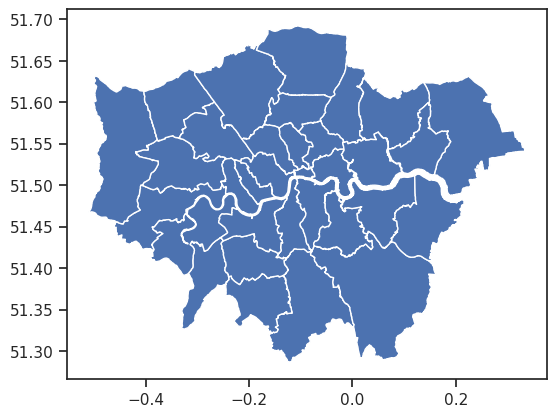

In [49]:
london_geodata.plot()

In [50]:
merged = london_geodata.merge(airbnb_data, how='left', left_on='neighbourhood', right_on='neighbourhood_cleansed')
merged

neighbourhood                                           geometry  \
0     Kingston upon Thames  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...   
1     Kingston upon Thames  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...   
2     Kingston upon Thames  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...   
3     Kingston upon Thames  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...   
4     Kingston upon Thames  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...   
...                    ...                                                ...   
4229  Barking and Dagenham  MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...   
4230  Barking and Dagenham  MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...   
4231  Barking and Dagenham  MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...   
4232  Barking and Dagenham  MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...   
4233  Barking and Dagenham  MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...   

      host_total_listings_count host_is_superhost  \
0                         423.0                 f   
1                           5.0                 t   
2                           3.0                 t   
3                           2.0                 f   
4                           2.0                 f   
...                         ...               ...   
4229                        7.0                 t   
4230                        2.0                 f   
4231                        3.0                 f   
4232                      452.0                 f   
4233                        2.0                 f   

                                  neighborhood_overview  \
0                                                   NaN   
1       Very safe residential area of South West London   
2                                                   NaN   
3     Leafy suburb close to London <br />Surrounded ...   
4     Walking alongside the river ,stopping at Ham h...   
...                                                 ...   
4229                                                NaN   
4230                                                NaN   
4231                                                NaN   
4232                                                NaN   
4233                                                NaN   

                                            description host_since  \
0     All discounts are already included, please go ... 2017-06-16   
1     Has its own Kitchen and Bathroom; Comfortable ... 2017-10-03   
2     Self contained 1 Double Bedroom Annexe close t... 2018-01-19   
3     Luxury 3 bedroom spacious house in Cosy comfor... 2018-05-15   
4     Greater London<br /><br /> Garden flat<br /><b... 2018-10-24   
...                                                 ...        ...   
4229  You'll have a great time at this comfortable p... 2018-08-23   
4230  We're so pleased to welcome to our modern oasi... 2017-08-24   
4231  Welcome to your dream London getaway! Immerse ... 2018-07-03   
4232  ✉ 𝗦𝗣𝗘𝗖𝗜𝗔𝗟 𝗥𝗔𝗧𝗘𝗦 𝗔𝗩𝗔𝗜𝗟𝗔𝗕𝗟𝗘 ✉<br /><br />★ Speci... 2017-10-01   
4233  Bring the whole family to this great place wit... 2018-10-23   

     host_identity_verified neighbourhood_cleansed   latitude  longitude  \
0                         t   Kingston upon Thames  51.413200  -0.268460   
1                         t   Kingston upon Thames  51.388450  -0.266710   
2                         t   Kingston upon Thames  51.367960  -0.306440   
3                         t   Kingston upon Thames  51.393180  -0.278930   
4                         t   Kingston upon Thames  51.398590  -0.300390   
...                     ...                    ...        ...        ...   
4229                      t   Barking and Dagenham  51.535344   0.139849   
4230                      t   Barking and Dagenham  51.533490   0.113390   
4231                      t   Barking and Dagenham  51.535808   0.073378   
4232                      t   Barking and Dagenham  51.549061   0.135310   
4233             

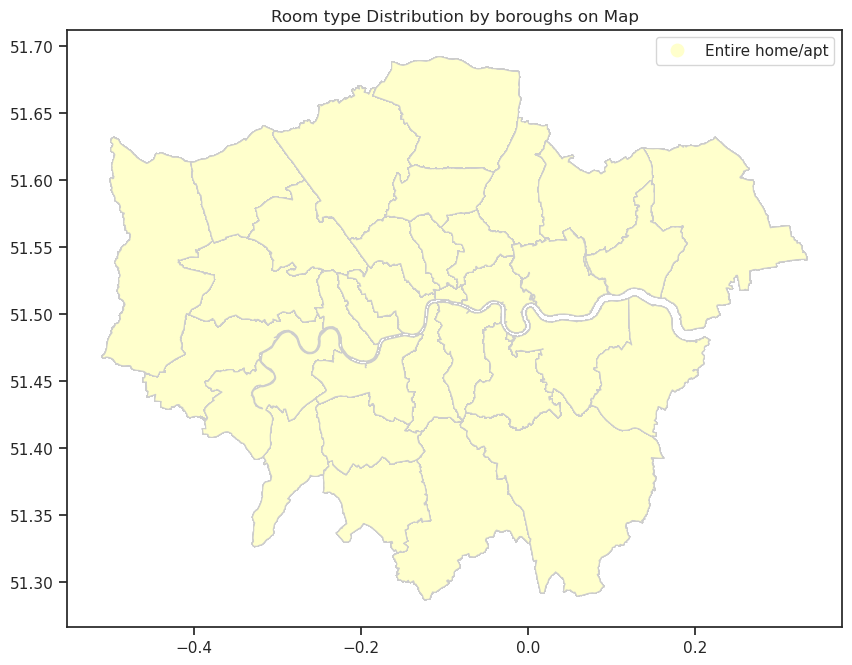

In [51]:
 #Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(column='room_type', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

#Add a title
plt.title('Room type Distribution by boroughs on Map')

# Show the plot
plt.show()

In [52]:
housing_data

Year Quarter       Code                  Area        Category  \
4005  2016      Q1  E09000002  Barking and Dagenham            Room   
4006  2016      Q1  E09000003                Barnet            Room   
4007  2016      Q1  E09000004                Bexley            Room   
4008  2016      Q1  E09000005                 Brent            Room   
4009  2016      Q1  E09000006               Bromley            Room   
...    ...     ...        ...                   ...             ...   
5847  2018      Q3  E12000007                LONDON  All categories   
5848  2018      Q3  E12000008            SOUTH EAST  All categories   
5849  2018      Q3  E12000009            SOUTH WEST  All categories   
5850  2018      Q3  E13000001          Inner London  All categories   
5851  2018      Q3  E13000002          Outer London  All categories   

     Count of rents  Average Lower quartile Median Upper quartile  
4005             20    526.0            425    520            650  
4006             70    643.0            550    628            700  
4007             20    466.0            433    460            498  
4008             70    656.0            550    650            737  
4009             30    514.0            475    510            557  
...             ...      ...            ...    ...            ...  
5847          56760   1679.0           1200   1473           1863  
5848          80170    984.0            700    875           1125  
5849          68050    796.0            575    700            875  
5850          30230   1934.0           1365   1650           2167  
5851          26530   1388.0           1050   1300           1550  

[1835 rows x 10 columns]

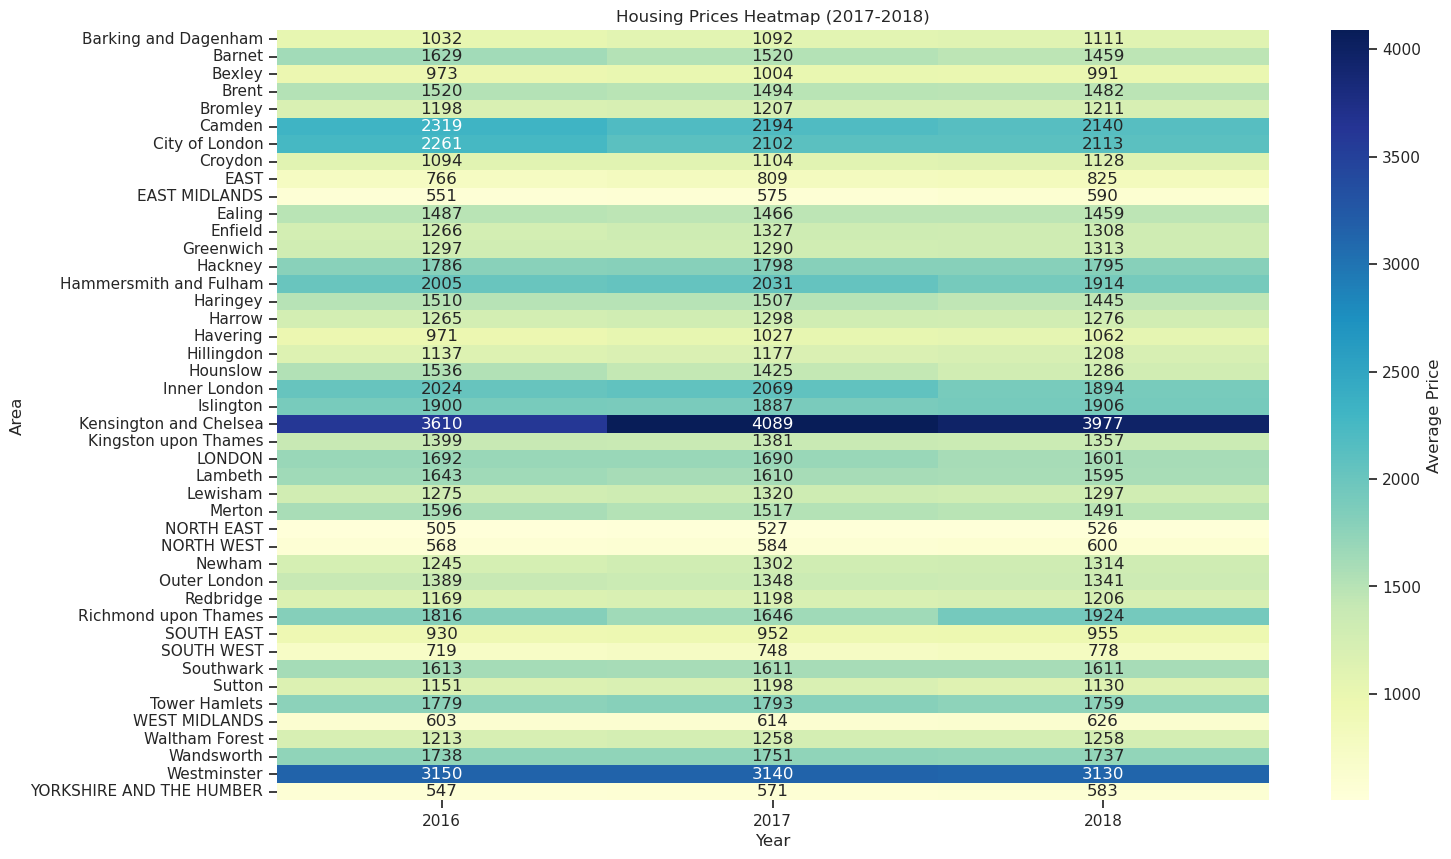

In [58]:
# Create a pivot table
heatmap_data = housing_data.pivot_table(index='Area', columns='Year', values='Average', aggfunc='mean')

# Create the heatmap using seaborn
plt.figure(figsize=(16, 10))
sn.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title('Housing Prices Heatmap (2017-2018)')
plt.show()

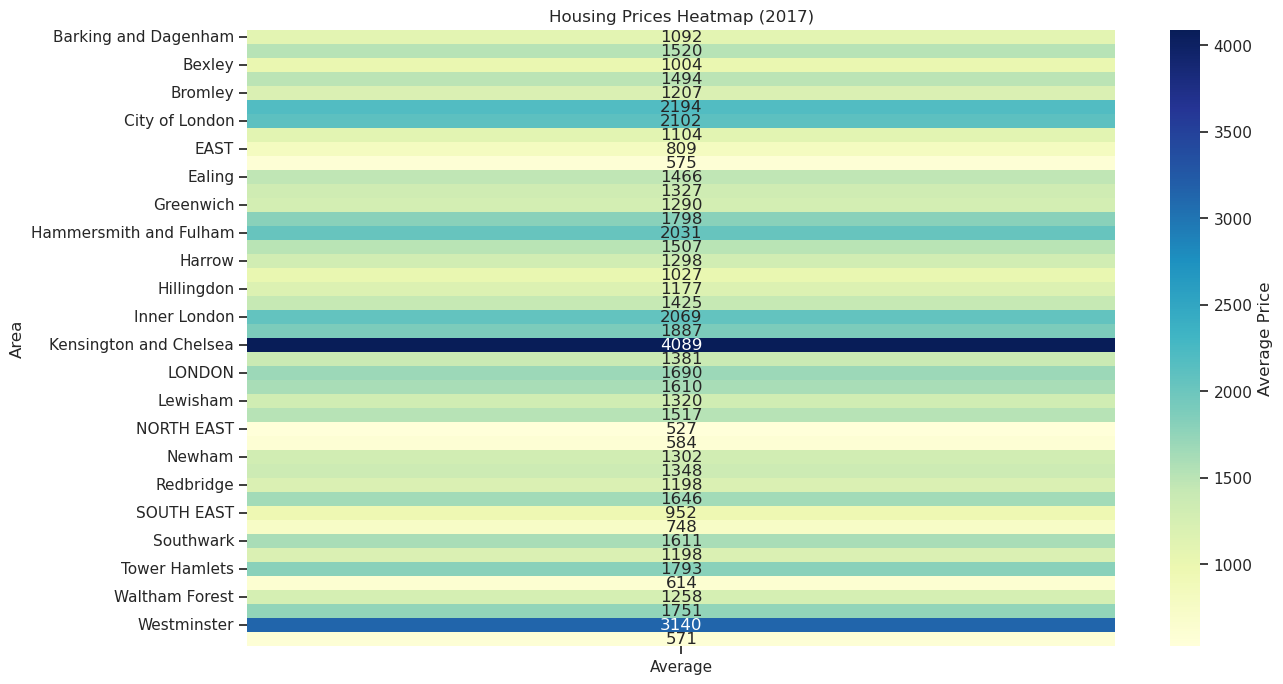

In [66]:
heatmap_data_2017 = housing_data[housing_data['Year'] == 2017].pivot_table(index='Area', values='Average', aggfunc='mean')

# Create the heatmap using seaborn
plt.figure(figsize=(14, 8))
sn.heatmap(heatmap_data_2017, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title('Housing Prices Heatmap (2017)')
plt.show()

In [68]:
#filtered_data = housing_data[housing_data['Year'].isin([2017])]

# Create pivot tables for each year
#heatmap_data_2017 = filtered_data[filtered_data['Year'] == 2017].pivot_table(index='Area', values='Average', aggfunc='mean')
#heatmap_data_2019 = filtered_data[filtered_data['Year'] == 2019].pivot_table(index='Area', values='Average', aggfunc='mean')

# Create subplots for side-by-side comparison
#fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create heatmap for 2017
#sn.heatmap(heatmap_data_2017, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'}, ax=axes[0])
#axes[0].set_title('Housing Prices Heatmap (2017)')

# Create heatmap for 2019
#sn.heatmap(heatmap_data_2019, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'}, ax=axes[1])
#axes[1].set_title('Predicted Housing Prices Heatmap (2019)')

#plt.show()

In [69]:
airbnb_data.host_since

0      2017-02-23
127    2018-04-08
141    2018-09-19
158    2018-09-19
207    2017-01-04
          ...    
6677   2018-11-30
6678   2017-10-16
6680   2017-01-07
6681   2017-01-01
6682   2017-08-15
Name: host_since, Length: 4234, dtype: datetime64[ns]

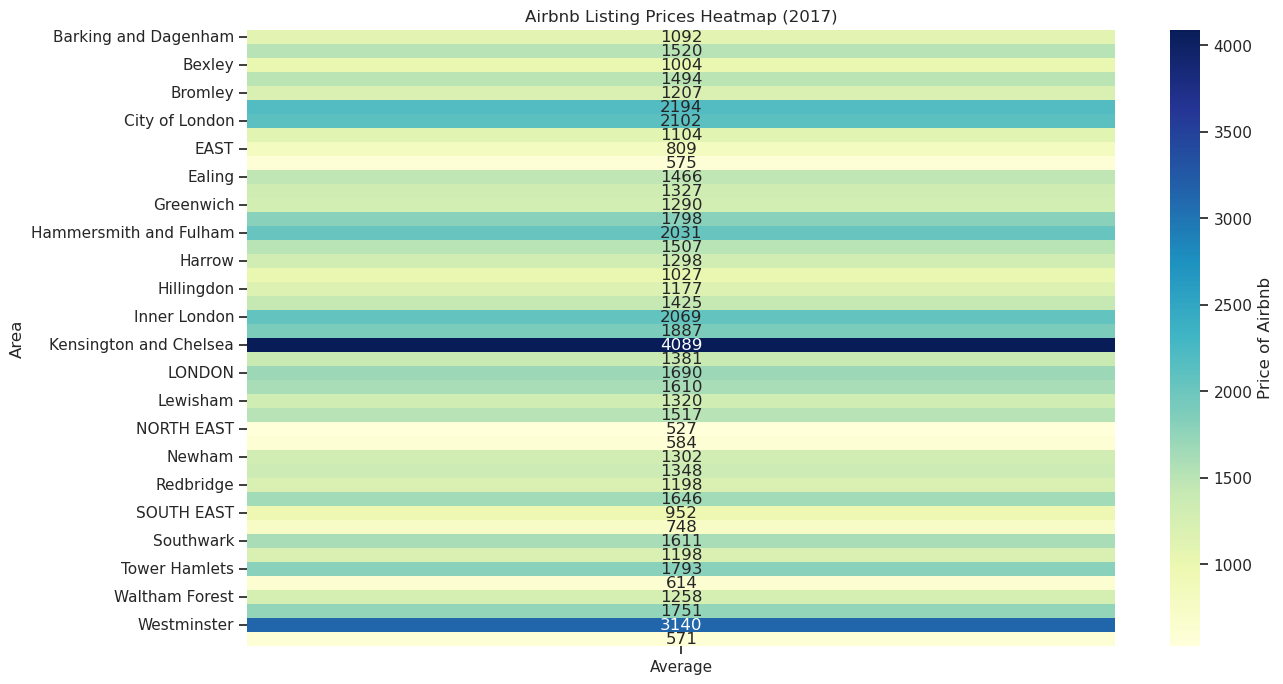

In [72]:
heatmap_airbnb_2017 = airbnb_data[airbnb_data['host_since'] == 2017].pivot_table(index='neighbourhood_cleansed', values='price', aggfunc='mean')

# Create the heatmap using seaborn
plt.figure(figsize=(14, 8))
sn.heatmap(heatmap_data_2017, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Price of Airbnb'})
plt.title('Airbnb Listing Prices Heatmap (2017)')
plt.show()

In [ ]:
"""
===
Heatmap for London's Airbnb by London's Airbnb's density
===
"""

In [73]:
housing_data.columns

Index(['Year', 'Quarter', 'Code', 'Area', 'Category', 'Count of rents',
       'Average', 'Lower quartile', 'Median', 'Upper quartile'],
      dtype='object')

In [75]:
housing_data = pd.concat([housing_data,
                          pd.get_dummies(housing_data['Year'], prefix='year', drop_first=True),
                          pd.get_dummies(housing_data['Quarter'], prefix='quarter', drop_first=True),
                          pd.get_dummies(housing_data['Code'], prefix='code', drop_first=True),
                          pd.get_dummies(housing_data['Area'], prefix='area', drop_first=True)], axis=1)

In [91]:
#formula = "Average ~ Q('Count of rents) + Q('Lower quartile') + Median + Q('Upper quartile') + Year + Quarter + Code + Area"
formula = "Average ~ Q('Count of rents') + Q('Lower quartile') + Median + Q('Upper quartile') + Year + Quarter + Code + Area"

In [92]:
model = sm.OLS.from_formula(formula, data=housing_data).fit()

In [93]:
model

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U20'), dtype('float64')) -> None

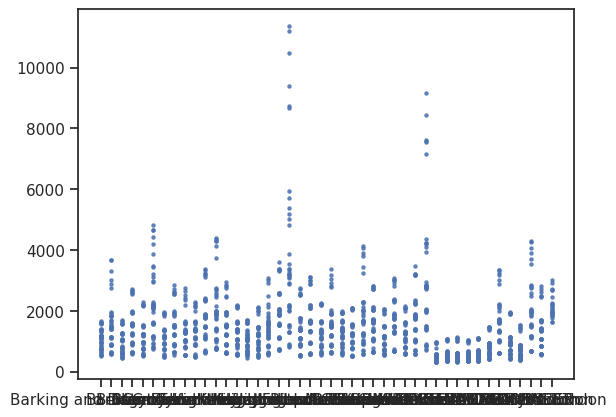

In [101]:
# Plot the relationship between 'Year' and 'Average'
sn.regplot(x='Area', y='Average', data=housing_data, scatter_kws={'s': 5})

# Display the plot
plt.show()

/tmp/ipykernel_162194/608543610.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=45)


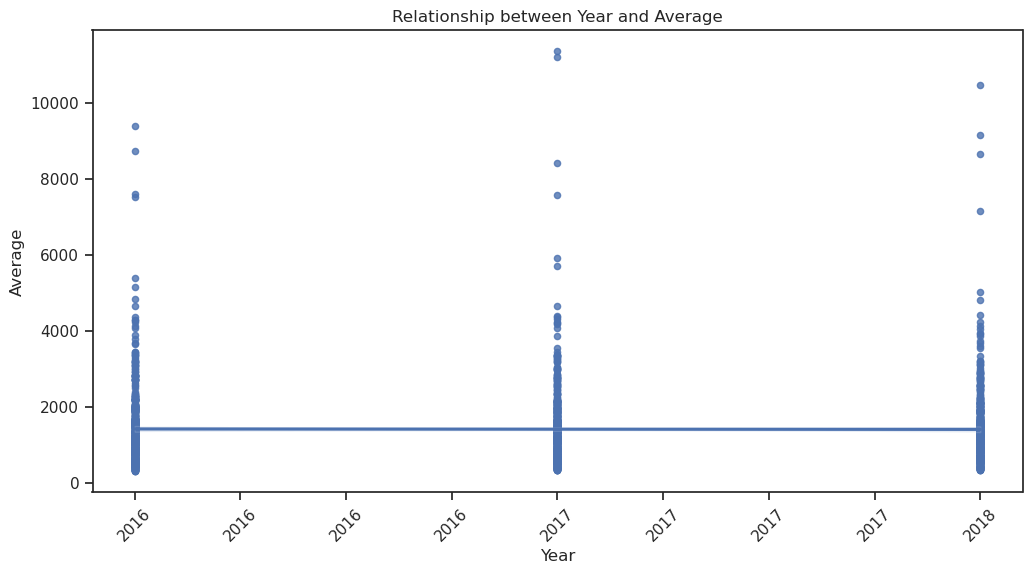

In [99]:
# Increase figure size
plt.figure(figsize=(12, 6))

# Plot the relationship between 'Year' and 'Average' with rotated tick labels
ax = sn.regplot(x='Year', y='Average', data=housing_data, scatter_kws={'s': 20})

# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticks(), rotation=45)

# Format year labels as integers (assuming 'Year' is in decimal format)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Relationship between Year and Average')
plt.savefig('Regression_Model.png')

# Display the plot
plt.show()

In [100]:
std_deviation = housing_data['Average'].std()

print(f"Standard Deviation for 'Average' column: {std_deviation}")

Standard Deviation for 'Average' column: 1021.4826470168797


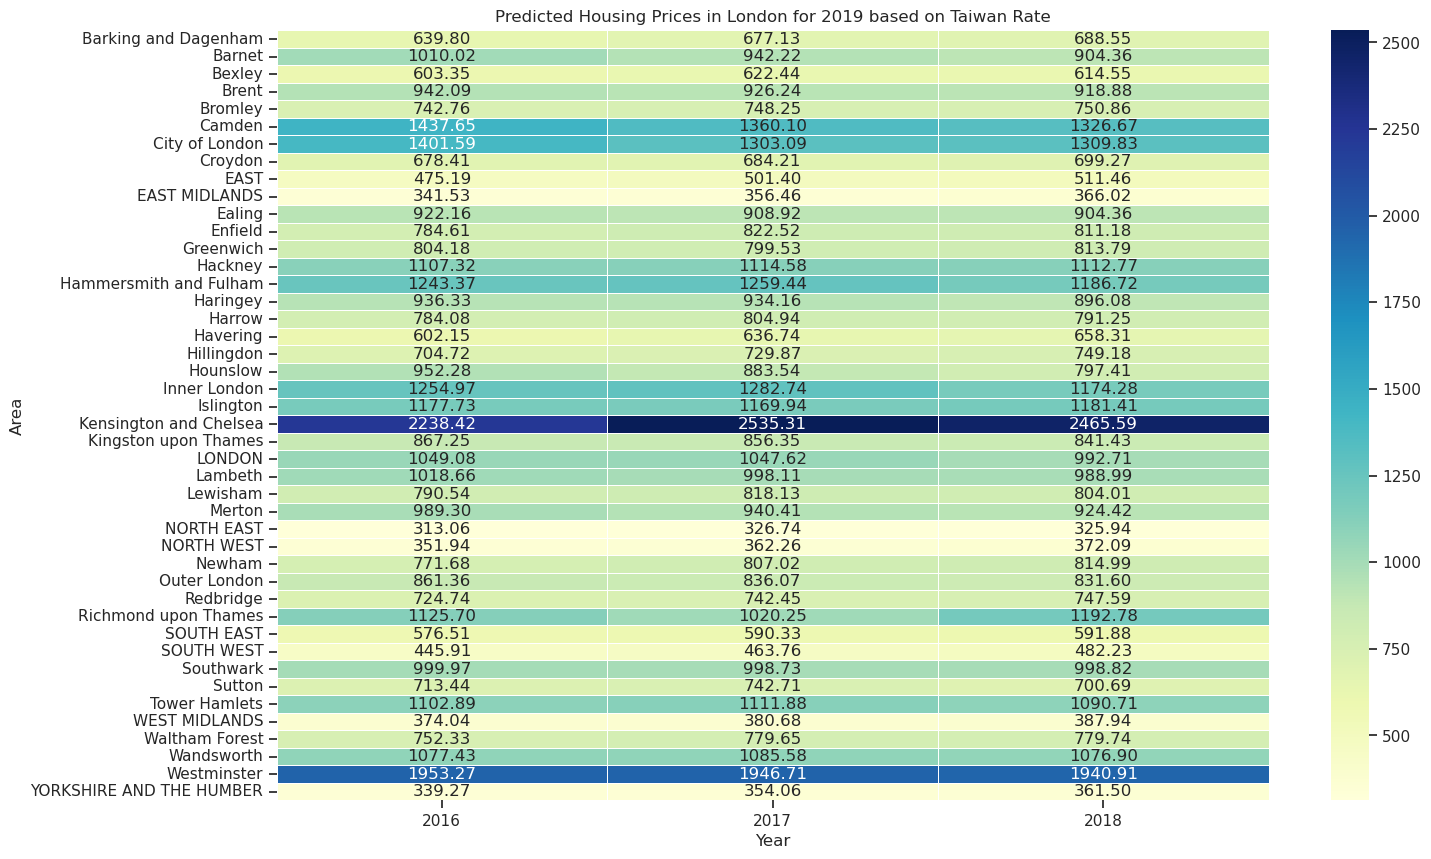

In [109]:
#  'taiwan_rate' is the rate observed in Taiwan for the same period

# Calculate the predicted values for London in 2019
housing_data['Predicted_2019'] = housing_data['Average'] * (1 - 0.38)

# Creating a pivot table
heatmap_data = housing_data.pivot_table(index='Area', columns='Year', values='Predicted_2019', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sn.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Predicted Housing Prices in London for 2019 based on Taiwan Rate')
plt.savefig('HeatMap_LongTermListing.png')
plt.show()

In [110]:
airbnb_data.columns

Index(['host_total_listings_count', 'host_is_superhost',
       'neighborhood_overview', 'description', 'host_since',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'bathrooms_text', 'bedrooms',
       'beds', 'number_of_reviews', 'price', 'availability_365'],
      dtype='object')

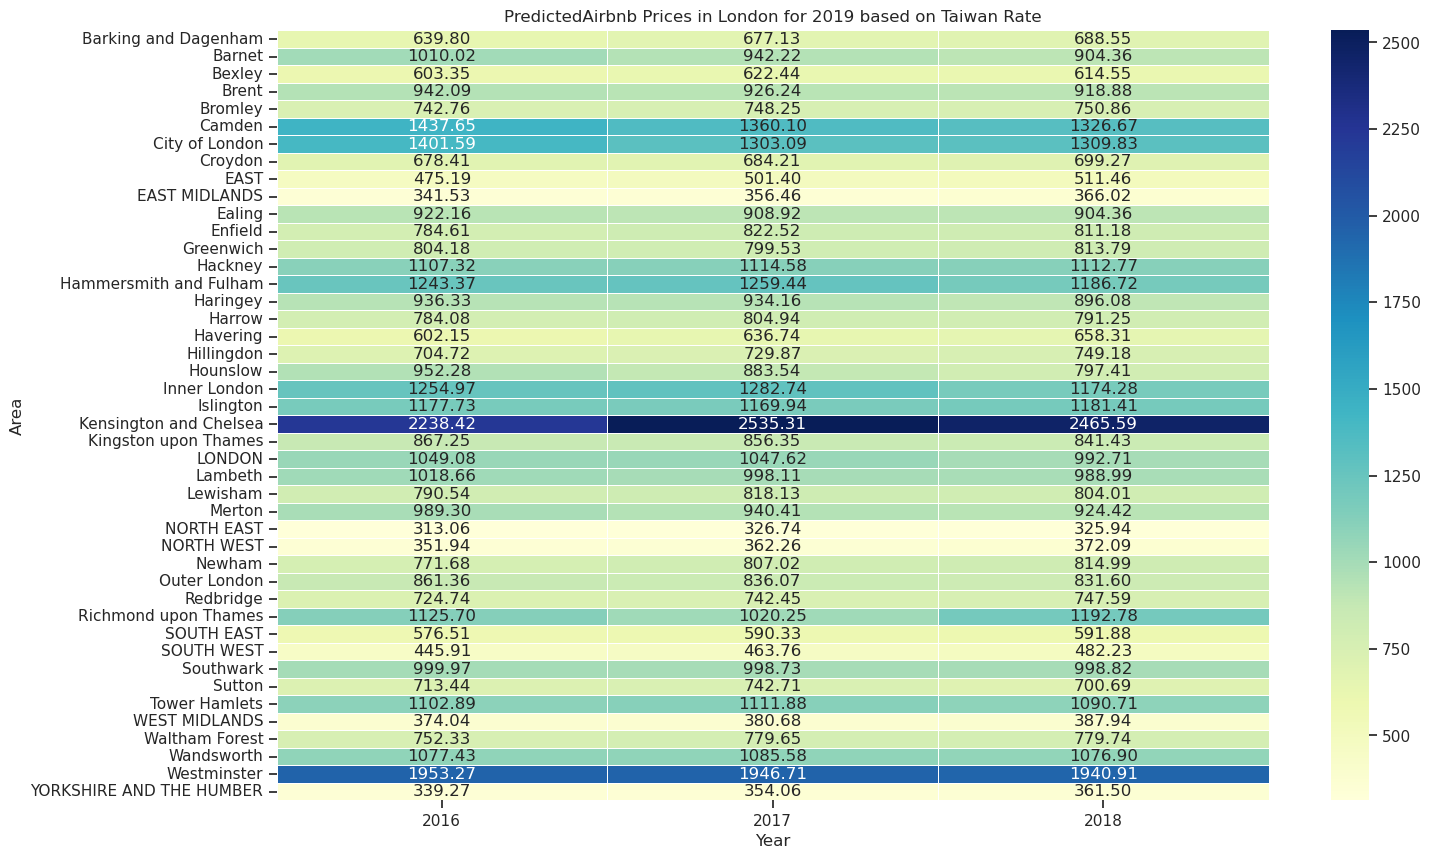

In [111]:
#  'taiwan_rate' is the rate observed in Taiwan for the same period

# Calculate the predicted values for London in 2019
airbnb_data['Predicted_2019'] = airbnb_data['price'] * (1 - 0.38)

# Creating a pivot table
heatmap_airbnb_data = airbnb_data.pivot_table(index='neighbourhood_cleansed', columns='host_since', values='Predicted_2019', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sn.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('PredictedAirbnb Prices in London for 2019 based on Taiwan Rate')
plt.savefig('HeatMap_Airbnb_Listing.png')
plt.show()

In [ ]:
# Line chart for actual values
sns.lineplot(x='Year', y='Actual_Values', data=prediction_data, label='Actual')

# Line chart for predicted values
sns.lineplot(x='Year', y='Predicted_Values', data=prediction_data, label='Predicted')

plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Year')
plt.ylabel('Average')
plt.legend()
plt.show()

In [ ]:
# """
# ===
# Reproduce the model from the literature review
# ===
# """





# # Define the treatment and control groups
# treatment_cities = ['Taipei', 'New Taipei City', 'Taoyuan City']
# control_cities = ['Kaohsiung', 'Tainan', 'Chiayi City']

# treatment_period = [2015, 2016, 2017]
# control_period = [2018, 2019, 2020]

# # Create the treatment and control variables
# treatment = np.zeros(len(data))
# for i in range(len(data)):
#     if data.loc[i, 'city'] in treatment_cities and data.loc[i, 'year'] in treatment_period:
#         treatment[i] = 1

# control = np.zeros(len(data))
# for i in range(len(data)):
#     if data.loc[i, 'city'] in control_cities and data.loc[i, 'year'] in control_period:
#         control[i] = 1

# # Create the interaction variable
# interaction = treatment * control

# # Define the dependent variable (housing rental price)
# rent = data['rent']

# # Estimate the DID model
# model = sm.OLS(rent, sm.add_constant([treatment, control, interaction]))
# results = model.fit()

# # Print the results
# print(results.summary())

# # Extract the coefficient of the interaction variable
# coefficient_interaction = results.params['interaction']

# # Calculate the effect of Airbnb on housing rental prices
# effect_airbnb = coefficient_interaction * 100

# print('The estimated effect of Airbnb on housing rental prices is:', effect_airbnb, '%')
